# STUDY ASSOCIATION OF CH MUTATIONS WITH AGE



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
### OPEN AGE DATA

# Read data
filename = "/workspace/projects/clonalhemato_ukb/analysis_50k_202103/data/ukb50k_age_recruitment-Copy1.txt"
lines = ''.join([line for line in open(filename, 'rt')])
lines = lines.replace('"',' ')

# Transform to df
age_df = pd.read_csv(StringIO(lines), sep= ' ')
age_df = age_df[['eid', '21022-0.0']] 
age_df = age_df.rename(columns = {'eid': 'patient', '21022-0.0': 'age_recruit'}, inplace = False)
age_df

,patient,age_recruit
0,1000019,54.0
1,1000022,53.0
2,1000035,59.0
3,1000046,45.0
4,1000054,65.0
...,...,...
502480,6024829,65.0
502481,6024837,61.0
502482,6024841,47.0
502483,6024853,54.0


In [3]:
# Statistics
age_df['age_recruit'].describe()

count    487125.000000
mean         53.592887
std          16.971576
min        -999.000000
25%          49.000000
50%          57.000000
75%          63.000000
max          73.000000
Name: age_recruit, dtype: float64

In [4]:
# Null values
len(age_df[age_df['age_recruit'].isnull()])

15360

In [5]:
# Age distribution
pd.set_option('display.max_rows', 50)
age_df['age_recruit'].value_counts().sort_index()
#pd.set_option('display.max_rows', 20)

-999.0        1
-818.0       41
-313.0        1
-121.0       27
 0.0       7280
 1.0      16816
 2.0       1054
 3.0        302
 4.0        521
 5.0          7
 11.0         1
 14.0         1
 37.0         1
 38.0         1
 39.0         5
 40.0      5075
 41.0     10141
 42.0     10186
 43.0     10806
 44.0     11073
 45.0     11512
 46.0     11441
 47.0     11813
 48.0     12140
 49.0     12730
 50.0     12811
 51.0     13582
 52.0     13678
 53.0     14114
 54.0     14446
 55.0     15113
 56.0     15620
 57.0     16029
 58.0     17007
 59.0     18056
 60.0     22232
 61.0     23993
 62.0     23401
 63.0     21694
 64.0     21017
 65.0     20889
 66.0     19143
 67.0     17529
 68.0     16131
 69.0     15325
 70.0      2332
 71.0         3
 72.0         3
 73.0         1
Name: age_recruit, dtype: int64

In [6]:
### Eliminate ages <37
# See https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=21022

age_df = age_df[age_df['age_recruit'] > 36]

age_df['age_recruit'] = age_df['age_recruit'].astype(int)

round(age_df['age_recruit'].describe(), 2)

<ipython-input-6-676eb3880078>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['age_recruit'] = age_df['age_recruit'].astype(int)


count    461073.00
mean         56.66
std           8.13
min          37.00
25%          50.00
50%          58.00
75%          63.00
max          73.00
Name: age_recruit, dtype: float64

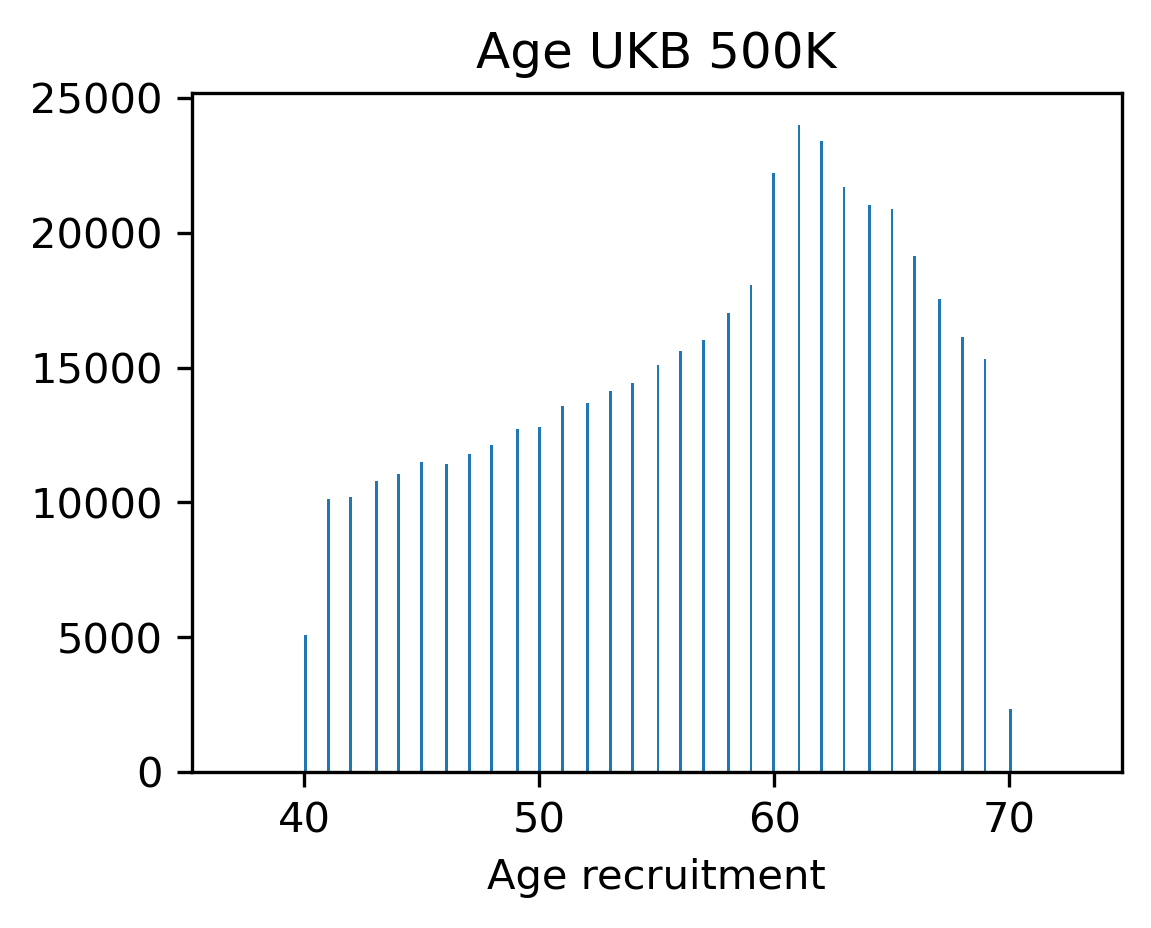

In [7]:
# Histogram

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(age_df['age_recruit'],300)
plt.title('Age UKB 500K')
plt.xlabel('Age recruitment')
plt.ylabel('')
plt.show()

In [8]:
# age_df['age_recruit'].plot.hist(grid=True, bins=20, rwidth=0.9,
#                    color='#607c8e')
# plt.title('Commute Times for 1,000 Commuters')
# plt.xlabel('Counts')
# plt.ylabel('Commute Time')
# plt.grid(axis='y', alpha=0.75)

# Divide by age groups

In [9]:
def age_group(age):
    if age <= 45:
        return "39-45"
    elif age <= 50:
        return "45-50"
    elif age <= 55:
        return "50-55"
    elif age <= 60:
        return "55-60"
    elif age <= 65:
        return "60-65"
    elif age <= 70:
        return "65-70"
    else:
        return ">70"

age_df['age_group'] = age_df['age_recruit'].apply(lambda x: age_group(x))

age_df

<ipython-input-9-352853b7590a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['age_group'] = age_df['age_recruit'].apply(lambda x: age_group(x))


,patient,age_recruit,age_group
0,1000019,54,50-55
1,1000022,53,50-55
2,1000035,59,55-60
3,1000046,45,39-45
4,1000054,65,60-65
...,...,...,...
502480,6024829,65,60-65
502481,6024837,61,60-65
502482,6024841,47,45-50
502483,6024853,54,50-55


# Select patients with WES

In [10]:
### READ FULL DATA FRAME (ALL POTENTIAL CH MUTATIONS)

CH_mutations_50K_read = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_potential_50k.txt.gz',
                                sep="\t")

In [11]:
CH_mutations_50K_read

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient
0,1,204532210,.,A,G,0.00,2,17,0.117647,0.882353,1,SNV,missense_variant,MODERATE,MDM4,ENST00000367182,307,103,R/G,NaN,ENSP00000356150,NaN,NaN,0/0,"15,2,0",2,NaN,NaN,"0,2,477,45,483,526","11,4,1,1",BaseQRankSum=-1.345;DP=17;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|MDM4|ENSG000001986...,.,CSQ=G|missense_variant|MODERATE|MDM4|ENSG00000...,4033478
1,7,152235860,rs199504848,C,T,0.13,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.013970,0.018870,0/1,"56,6,0",13,NaN,NaN,"13,0,1714,181,1732,1913","34,22,4,2",BaseQRankSum=0.288;DB;DP=62;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
2,7,152238768,rs4024420,T,C,0.75,4,28,0.142857,0.857143,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.041240,0.051350,0/1,"24,4,0",21,NaN,NaN,"21,0,703,93,715,808","12,12,0,4",BaseQRankSum=3.245;DB;DP=28;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4033478
3,7,152238825,rs4024419,C,T,12.99,4,20,0.200000,0.800000,1,SNV,missense_variant&splice_region_variant,MODERATE,KMT2C,ENST00000262189,2534,845,G/E,rs4024419,ENSP00000262189,0.019910,0.028420,0/1,"16,4,0",41,NaN,NaN,"41,0,505,89,517,606","5,11,0,4",BaseQRankSum=0.049;DB;DP=20;ExcessHet=3.0103;M...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4033478
4,7,152247986,rs150073007,G,GT,166.73,9,44,0.204545,0.795455,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.487200,0.484900,0/1,"35,9,0",99,NaN,NaN,"204,0,1155,310,1182,1491","26,9,5,4",BaseQRankSum=-0.888;DB;DP=46;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4033478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702229,8,100706893,rs79986761,G,A,4.61,2,20,0.100000,0.900000,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1441,481.0,R/C,rs79986761,ENSP00000313007,0.088980,0.091720,0/1,"18,2,0",31,NaN,NaN,"31,0,737,86,745,830","10,8,2,0",BaseQRankSum=0.827;DB;DP=20;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,4021885
702230,8,100706910,rs79940439,C,T,18.82,5,35,0.142857,0.857143,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1424,475.0,R/Q,rs79940439,ENSP00000313007,0.237500,0.246800,0/1,"30,5,0",47,NaN,NaN,"47,0,854,136,869,1005","13,17,3,2",BaseQRankSum=0.342;DB;DP=35;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=T|missense_variant|MODERATE|PABPC1|ENSG000...,4021885
702231,8,100706973,rs72681439,A,G,121.77,7,28,0.250000,0.750000,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1361,454.0,I/T,rs72681439,ENSP00000313007,0.266400,0.283500,0/1,"21,7,0",99,NaN,NaN,"150,0,688,213,709,922","4,17,2,5",BaseQRankSum=1.455;DB;DP=30;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,4021885
702232,8,100706997,rs758404026,G,GGATGAGGT,8.41,2,15,0.133333,0.866667,1,Indel,frameshift_variant&splice_region_variant,HIGH,PABPC1,ENST00000318607,1336-1337,446.0,P/HLIX,rs758404026,ENSP00000313007,0.002511,0.002955,0/1,"13,2,0",45,NaN,NaN,"45,0,526,84,532,616","3,10,0,2",BaseQRankSum=-0.463;DB;DP=16;ExcessHet=3.0103;...,CSQ=GATGAGGT|frameshift_variant&splice_region_...,.,CSQ=GATGAGGT|frameshift_variant&splice_region_...,4021885


In [12]:
CH_mutations_50K_read.groupby('patient').size()

patient
1000078     5
1000141    17
1000255    25
1000362     6
1000734    17
           ..
6024345    11
6024399     8
6024455     9
6024796    13
6024837    19
Length: 49989, dtype: int64

In [127]:
# Merge all potential CH mutations with age

CH_mutations_50K_age = pd.merge(CH_mutations_50K_read, age_df,  how='inner', on='patient')


CH_mutations_50K_age

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,age_recruit,age_group
0,4,105275794,rs2454206,A,G,250.77,12,41,0.292683,0.707317,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,5284,1762,I/V,rs2454206&COSV54396998,ENSP00000442788,0.30090,0.36630,0/1,"29,12,0",99,NaN,NaN,"279,0,834,366,871,1237","14,15,8,4",BaseQRankSum=-0.394;DB;DP=41;ExcessHet=3.0103;...,G|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=G|3_prime_UTR_variant&NMD_transcript_varia...,4335241,61,60-65
1,5,112828863,.,C,A,0.00,2,35,0.057143,0.942857,1,SNV,missense_variant,MODERATE,APC,ENST00000257430,1634,545,A/E,NaN,ENSP00000257430,NaN,NaN,0/0,"33,2,0",59,0|1,112828863_C_A,"0,59,1748,102,1754,1798","25,8,1,1",BaseQRankSum=-1.517;DP=35;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|APC|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|APC|ENSG000001...,4335241,61,60-65
2,7,152235860,rs199504848,C,T,59.77,10,57,0.175439,0.824561,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2726,909,R/K,rs199504848,ENSP00000262189,0.01397,0.01887,0/1,"47,10,0",88,NaN,NaN,"88,0,1323,230,1353,1582","24,23,5,5",BaseQRankSum=-1.240;DB;DP=57;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2C|ENSG0000...,4335241,61,60-65
3,7,152238768,rs4024420,T,C,54.77,6,27,0.222222,0.777778,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2591,864,E/G,rs4024420,ENSP00000262189,0.04124,0.05135,0/1,"21,6,0",83,NaN,NaN,"83,0,591,146,609,755","11,10,0,6",BaseQRankSum=2.527;DB;DP=27;ExcessHet=3.0103;M...,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=C|missense_variant|MODERATE|KMT2C|ENSG0000...,4335241,61,60-65
4,7,152247986,rs150073007,G,GT,99.73,6,29,0.206897,0.793103,1,Indel,stop_gained&frameshift_variant,HIGH,KMT2C,ENST00000262189,2447-2448,816,Y/*,rs150073007,ENSP00000262189,0.48720,0.48490,0/1,"23,6,0",99,NaN,NaN,"137,0,754,206,772,978","15,8,2,4",BaseQRankSum=-0.925;DB;DP=29;ExcessHet=3.0103;...,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,.,CSQ=T|stop_gained&frameshift_variant|HIGH|KMT2...,4335241,61,60-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525008,8,100706910,rs79940439,C,T,20.80,5,41,0.121951,0.878049,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1424,475,R/Q,rs79940439,ENSP00000313007,0.23750,0.24680,0/1,"36,5,0",49,NaN,NaN,"49,0,1101,157,1116,1273","20,16,2,3",BaseQRankSum=0.831;DB;DP=42;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=T|missense_variant|MODERATE|PABPC1|ENSG000...,3918253,64,60-65
525009,8,100706973,rs72681439,A,G,98.77,9,61,0.147541,0.852459,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1361,454,I/T,rs72681439,ENSP00000313007,0.26640,0.28350,0/1,"52,9,0",99,NaN,NaN,"127,0,1467,283,1494,1777","20,32,3,6",BaseQRankSum=3.208;DB;DP=66;ExcessHet=3.0103;M...,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=G|missense_variant|MODERATE|PABPC1|ENSG000...,3918253,64,60-65
525010,8,100709499,rs139094790,G,A,0.00,6,92,0.065217,0.934783,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1205,402,P/L,rs139094790,ENSP00000313007,0.02882,0.02545,0/0,"86,6,0",51,NaN,NaN,"0,51,3145,258,3163,3371","55,31,6,0",BaseQRankSum=-2.819;DB;DP=94;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,3918253,64,60-65
525011,8,100709611,rs202074479,C,A,0.25,13,151,0.086093,0.913907,1,SNV,missense_variant,MODERATE,PABPC1,ENST00000318607,1093,365,V/L,rs202074479,ENSP00000313007,0.12190,0.11160,0/1,"138,13,0",16,NaN,NaN,"16,0,4590,431,4629,5060","68,70,2,11",BaseQRankSum=-2.618;DB;DP=151;ExcessHet=3.0103...,CSQ=A|missense_variant|MODERATE|PABPC1|ENSG000...,.,CSQ=A|missense_variant|MODERATE|PABPC1|

In [14]:
# Number of mutations in patients with age available

CH_mutations_50K_age = CH_mutations_50K_age[CH_mutations_50K_age['age_recruit'].notnull()]
len(CH_mutations_50K_age)

525013

In [195]:
# Number of patients with WES & age available

patients_all = CH_mutations_50K_age['patient'].unique()

len(patients_all)

37323

In [16]:
### Age data all WES patients

age_all = CH_mutations_50K_age['age_recruit']

round(age_all.describe(), 2)

count    525013.00
mean         56.94
std           8.15
min          39.00
25%          51.00
50%          58.00
75%          64.00
max          70.00
Name: age_recruit, dtype: float64

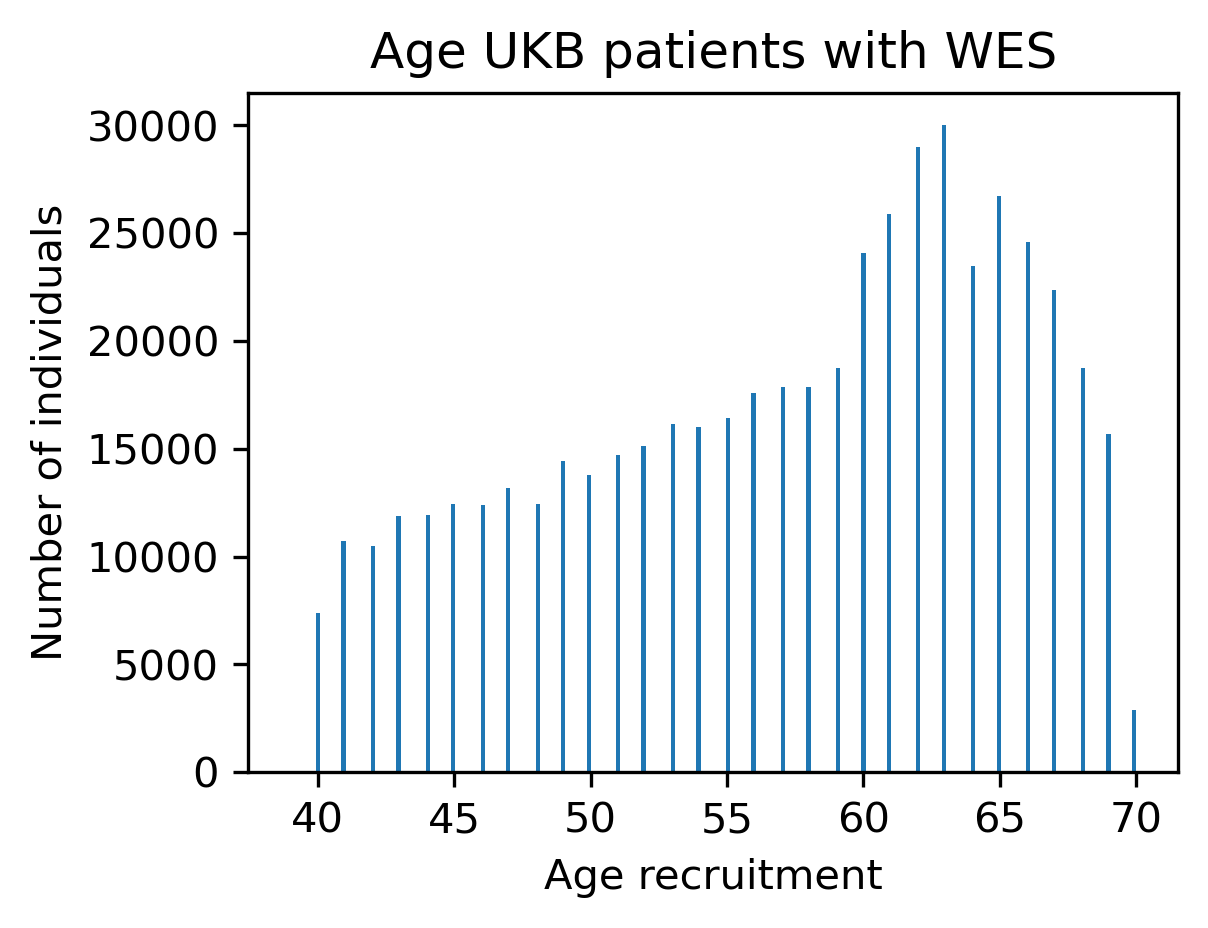

In [17]:
# Histogram

plt.hist(age_all, 200)
plt.title('Age UKB patients with WES')
plt.xlabel('Age recruitment')
plt.ylabel('Number of individuals')
plt.show()

In [130]:
### Age group data all WES patients

# Create list
agegroup_all = CH_mutations_50K_age.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_age.groupby(['patient', 'age_group']).size().groupby('age_group').size()

age_group
39-45    4583
45-50    4673
50-55    5559
55-60    6817
60-65    9704
65-70    5987
dtype: int64

In [19]:
# Make table age groups

agegroup_all_df = CH_mutations_50K_age.groupby(['patient', 'age_group']).size().groupby('age_group').size()
df = agegroup_all_df.to_frame()
df = df.reset_index()
df.columns = ['Age group','Number individuals']
df.head(10).style.set_properties(**{'text-align':'center'})

,Age group,Number individuals
0,39-45,4583
1,45-50,4673
2,50-55,5559
3,55-60,6817
4,60-65,9704
5,65-70,5987


# AGE IN ALL POTENTIAL CH MUTATIONS

In [20]:
CH_mutations_50K_filt = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_potential_filt_50k.txt.gz',
                                    sep= '\t')
CH_mutations_50K_filt

/home/sdemajo/miniconda3/envs/clonalh/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN
2,1,1787423,.,GC,G,0.00,2,43,0.046512,0.953488,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,930,310,G/X,NaN,ENSP00000367872,NaN,NaN,0/0,"41,2,0",58,NaN,NaN,"0,58,1389,123,1395,1460","18,23,1,1",BaseQRankSum=-1.284;DP=45;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1874879,NaN,NaN,NaN
3,1,1787432,.,AG,A,0.00,2,41,0.048780,0.951220,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,921,307,V/X,NaN,ENSP00000367872,NaN,NaN,0/0,"39,2,0",42,NaN,NaN,"0,42,1413,117,1419,1494","9,30,1,1",BaseQRankSum=-1.361;DP=41;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1850422,NaN,NaN,NaN
4,1,1789053,.,C,T,0.32,2,11,0.181818,0.818182,1,SNV,missense_variant&splice_region_variant,MODERATE,GNB1,ENST00000378609,916,306,G/S,NaN,ENSP00000367872,NaN,NaN,0/1,"9,2,0",17,NaN,NaN,"17,0,311,43,317,360","6,3,1,1",BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4645472,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146417,X,124100595,.,T,C,0.03,2,14,0.142857,0.857143,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/Q,NaN,ENSP00000360187,NaN,NaN,0/1,"12,2,0",7,NaN,NaN,"7,0,310,43,316,359","5,7,1,1",BaseQRankSum=-0.802;DP=14;ExcessHet=3.0103;MLE...,C|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=C|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,5744263,NaN,NaN,NaN
146418,X,124100595,.,T,C,0.03,2,14,0.142857,0.857143,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/Q,NaN,ENSP00000360187,NaN,NaN,0/1,"12,2,0",7,NaN,NaN,"7,0,368,43,374,418","4,8,1,1",BaseQRankSum=-1.462;DP=14;ExcessHet=3.0103;MLE...,C|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=C|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,1623960,NaN,NaN,NaN
146419,X,124100595,.,T,A,0.25,2,11,0.181818,0.818182,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3805,1269,*/K,NaN,ENSP00000360187,NaN,NaN,0/1,"9,2,0",16,NaN,NaN,"16,0,288,43,294,337","4,5,1,1",BaseQRankSum=-1.602;DP=11;ExcessHet=3.0103;MLE...,A|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=A|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,1686791,NaN,NaN,NaN
146420,X,124100596,.,A,T,0.06,2,13,0.153846,0.846154,1,SNV,stop_lost,HIGH,STAG2,ENST00000371145,3806,1269,*/L,NaN,ENSP00000360187,NaN,NaN,0/1,"11,2,0",10,NaN,NaN,"10,0,374,43,380,424","4,7,1,1",BaseQRankSum=-2.190;DP=13;ExcessHet=3.0103;MLE...,T|stop_lost|HIGH|STAG2|ENSG00000101972|Transcr...,.,CSQ=T|stop_lost|HIGH|STAG2|ENSG00000101972|Tra...,5949268,NaN,NaN,NaN


In [21]:
# Merge all potential CH mutations with age

CH_mutations_50K_filt_age = pd.merge(CH_mutations_50K_filt, age_df,  how='inner', on='patient')


CH_mutations_50K_filt_age

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,age_recruit,age_group
0,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,51,50-55
1,12,49027205,.,A,T,0.00,2,26,0.076923,0.923077,1,SNV,missense_variant,MODERATE,KMT2D,ENST00000301067,14761,4921,L/M,NaN,ENSP00000301067,NaN,NaN,0/0,"24,2,0",57,NaN,NaN,"0,57,848,71,853,867","19,5,1,1",BaseQRankSum=-2.215;DP=26;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|KMT2D|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|KMT2D|ENSG0000...,2577054,NaN,NaN,NaN,51,50-55
2,12,49030394,.,T,G,0.00,4,18,0.222222,0.777778,1,SNV,missense_variant,MODERATE,KMT2D,ENST00000301067,13885,4629,T/P,NaN,ENSP00000301067,NaN,NaN,0/0,"14,4,0",13,NaN,NaN,"0,13,435,41,445,473","3,11,0,4",BaseQRankSum=-2.395;DP=18;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|KMT2D|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|KMT2D|ENSG0000...,2577054,NaN,NaN,NaN,51,50-55
3,21,34792308,.,A,G,0.00,2,38,0.052632,0.789474,2,SNV,missense_variant,MODERATE,RUNX1,ENST00000300305,1270,424,S/P,COSV99038603&COSV99038622,ENSP00000300305,NaN,NaN,0/0,"30,2,6,0",45,NaN,NaN,"0,73,796,45,759,758,87,801,773,815","13,17,5,3",BaseQRankSum=-3.096;DP=43;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|RUNX1|ENSG0000...,.,CSQ=G|missense_variant|MODERATE|RUNX1|ENSG0000...,2577054,NaN,NaN,NaN,51,50-55
4,21,34792308,.,A,T,0.00,6,38,0.157895,0.789474,2,SNV,missense_variant,MODERATE,RUNX1,ENST00000300305,1270,424,S/T,COSV99038603&COSV99038622,ENSP00000300305,NaN,NaN,0/0,"30,2,6,0",45,NaN,NaN,"0,73,796,45,759,758,87,801,773,815","13,17,5,3",BaseQRankSum=-3.096;DP=43;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|RUNX1|ENSG0000...,.,CSQ=T|missense_variant|MODERATE|RUNX1|ENSG0000...,2577054,NaN,NaN,NaN,51,50-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109712,X,124095375,.,C,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3709,1237,P/T,NaN,ENSP00000360187,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,333,43,339,382","8,2,1,1",BaseQRankSum=-1.674;DP=12;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...,5529326,NaN,NaN,NaN,64,60-65
109713,X,124095445,.,A,G,0.03,2,14,0.142857,0.857143,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3779,1260,E/G,NaN,ENSP00000360187,NaN,NaN,0/1,"12,2,0",7,NaN,NaN,"7,0,338,43,344,387","3,9,1,1",BaseQRankSum=-1.127;DP=14;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=G|missense_variant|MODERATE|STAG2|ENSG0000...,5300724,NaN,NaN,NaN,60,55-60
109714,X,124095447,.,T,C,0.02,2,15,0.133333,0.866667,1,SNV,missense_variant&splice_region_variant,MODERATE,STAG2,ENST00000371145,3781,1261,S/P,NaN,ENSP00000360187,NaN,NaN,0/1,"13,2,0",4,NaN,NaN,"4,0,411,43,417,460","2,11,1,1",BaseQRankSum=-1.511;DP=15;ExcessHet=3.0103;MLE...,C|missense_variant&splice_region_variant|MODER...,.,CSQ=C|missense_variant&splice_region_variant|M...,1221137,NaN,NaN,NaN,68,65-70
109715,X,124100584,.,T,G,1.69,2,8,0.250000,0.750000,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3794,1265,V/G,NaN,ENSP00000360187,NaN,NaN,0/1,"6,2,0",25,NaN,NaN,"25,0,147,43,153,197","4,2,1,1",BaseQRankSum=-0.619;DP=8;ExcessHet=3.0103;MLEA...,G|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=G|missense_variant|MODERATE|STAG2|ENSG0000...,2377394,NaN,NaN,NaN,65,60

In [22]:
### Age data all patients with potential CH mutations

age_potCH = CH_mutations_50K_filt_age['age_recruit']

round(age_potCH.describe(), 2)

count    109717.00
mean         56.98
std           8.12
min          39.00
25%          51.00
50%          59.00
75%          64.00
max          70.00
Name: age_recruit, dtype: float64

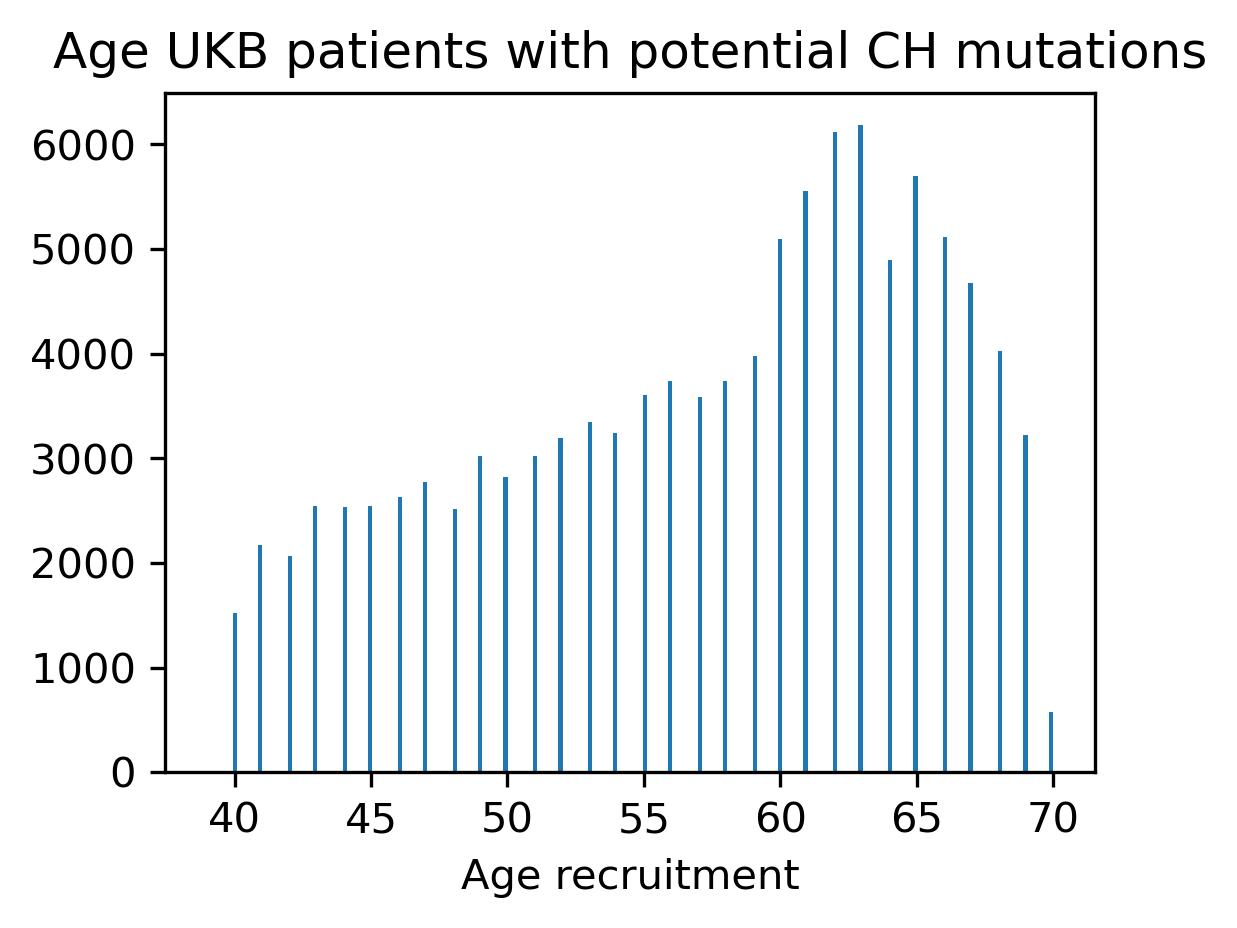

In [23]:
# Histogram

plt.rcParams["figure.figsize"] = (4,3)

plt.hist(age_potCH,200)
plt.title('Age UKB patients with potential CH mutations')
plt.xlabel('Age recruitment')
plt.ylabel('')
plt.show()

In [24]:
### Age group data all WES patients

# Create list
agegroup_pot = CH_mutations_50K_filt_age.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_filt_age.groupby(['patient', 'age_group']).size().groupby('age_group').size()

age_group
39-45    4225
45-50    4325
50-55    5121
55-60    6291
60-65    8916
65-70    5527
dtype: int64

In [25]:
### GROUP BY AGE

mut_agegroup_pot = CH_mutations_50K_filt_age.groupby('age_group').size().tolist()

CH_mutations_50K_filt_age.groupby('age_group').size()

age_group
39-45    13395
45-50    13760
50-55    16403
55-60    20125
60-65    28430
65-70    17604
dtype: int64

In [26]:
res_pot = [round(i / j * 100, 3) for i, j in zip(agegroup_pot, agegroup_all)]
res_pot

[92.189, 92.553, 92.121, 92.284, 91.88, 92.317]

In [27]:
agegroup_all

[4583, 4673, 5559, 6817, 9704, 5987]

In [28]:
res = [i / j for i, j in zip(mut_agegroup_pot, agegroup_pot)]
res

[3.1704142011834318,
 3.1815028901734106,
 3.2030853348955284,
 3.1990144651088857,
 3.1886496186630775,
 3.185091369639949]

## Add filter DNMT3A & AD>=3

In [29]:
CH_mutations_50K_filt3 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_potential_filt_50k_3.txt.gz',
                                    sep= '\t')
CH_mutations_50K_filt3

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,NaN
2,1,1789086,.,T,A,214.77,9,33,0.272727,0.727273,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,883,295,N/Y,NaN,ENSP00000367872,NaN,NaN,0/1,"24,9,0",99,NaN,NaN,"243,0,782,315,809,1124","17,7,7,2",BaseQRankSum=-1.131;DP=33;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,3929969,NaN,NaN,NaN,NaN
3,1,1789110,.,C,T,0.00,4,45,0.088889,0.911111,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,859,287,A/T,NaN,ENSP00000367872,NaN,NaN,0/0,"41,4,0",51,NaN,NaN,"0,51,1338,123,1349,1422","25,16,2,2",BaseQRankSum=-2.379;DP=45;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,2932449,NaN,NaN,NaN,NaN
4,1,1804420,.,T,C,2.44,3,19,0.157895,0.842105,1,SNV,splice_region_variant&synonymous_variant,LOW,GNB1,ENST00000378609,429,143,T,NaN,ENSP00000367872,NaN,NaN,0/1,"16,3,0",27,NaN,NaN,"27,0,498,75,507,582","10,6,1,2",BaseQRankSum=-1.352;DP=20;ExcessHet=3.0103;MLE...,CSQ=C|splice_region_variant&synonymous_variant...,.,CSQ=C|splice_region_variant&synonymous_variant...,1119016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,X,124090925,.,T,G,0.00,7,43,0.162791,0.837209,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3539,1180,M/R,NaN,ENSP00000360187,NaN,NaN,0/0,"36,7,0",15,NaN,NaN,"0,15,919,105,938,1029","14,22,7,0",BaseQRankSum=-2.490;DP=43;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=G|missense_variant|MODERATE|STAG2|ENSG0000...,2523965,NaN,NaN,NaN,NaN
7575,X,124090925,.,T,G,0.00,7,48,0.145833,0.854167,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3539,1180,M/R,NaN,ENSP00000360187,NaN,NaN,0/0,"41,7,0",43,NaN,NaN,"0,43,1234,121,1253,1330","12,29,7,0",BaseQRankSum=-2.974;DP=49;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=G|missense_variant|MODERATE|STAG2|ENSG0000...,2916101,NaN,NaN,NaN,NaN
7576,X,124090929,.,C,A,15.88,3,14,0.214286,0.785714,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3543,1181,S/R,NaN,ENSP00000360187,NaN,NaN,0/1,"11,3,0",44,NaN,NaN,"44,0,344,77,353,430","2,9,1,2",BaseQRankSum=-1.141;DP=14;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...,2117885,NaN,NaN,NaN,NaN
7577,X,124094103,.,C,A,0.03,3,24,0.125000,0.875000,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3664,1222,L/I,NaN,ENSP00000360187,NaN,NaN,0/1,"21,3,0",7,NaN,NaN,"7,0,747,70,756,826","9,12,1,2",BaseQRankSum=-2.057;DP=24;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...,2060537,NaN,NaN,NaN,NaN


In [30]:
# Merge all potential CH mutations with age

CH_mutations_50K_filt3_age = pd.merge(CH_mutations_50K_filt3, age_df,  how='inner', on='patient')


CH_mutations_50K_filt3_age

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0,age_recruit,age_group
0,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,NaN,51,50-55
1,1,1789086,.,T,A,214.77,9,33,0.272727,0.727273,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,883,295,N/Y,NaN,ENSP00000367872,NaN,NaN,0/1,"24,9,0",99,NaN,NaN,"243,0,782,315,809,1124","17,7,7,2",BaseQRankSum=-1.131;DP=33;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,3929969,NaN,NaN,NaN,NaN,63,60-65
2,1,1789110,.,C,T,0.00,4,45,0.088889,0.911111,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,859,287,A/T,NaN,ENSP00000367872,NaN,NaN,0/0,"41,4,0",51,NaN,NaN,"0,51,1338,123,1349,1422","25,16,2,2",BaseQRankSum=-2.379;DP=45;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,2932449,NaN,NaN,NaN,NaN,61,60-65
3,1,1804420,.,T,C,2.44,3,19,0.157895,0.842105,1,SNV,splice_region_variant&synonymous_variant,LOW,GNB1,ENST00000378609,429,143,T,NaN,ENSP00000367872,NaN,NaN,0/1,"16,3,0",27,NaN,NaN,"27,0,498,75,507,582","10,6,1,2",BaseQRankSum=-1.352;DP=20;ExcessHet=3.0103;MLE...,CSQ=C|splice_region_variant&synonymous_variant...,.,CSQ=C|splice_region_variant&synonymous_variant...,1119016,NaN,NaN,NaN,NaN,64,60-65
4,1,1804464,.,G,T,0.00,4,50,0.080000,0.920000,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,385,129,R/S,NaN,ENSP00000367872,NaN,NaN,0/0,"46,4,0",51,NaN,NaN,"0,51,1534,138,1546,1633","18,28,2,2",BaseQRankSum=-2.468;DP=50;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,5983217,NaN,NaN,NaN,NaN,56,55-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,X,124090925,.,T,G,0.00,4,19,0.210526,0.789474,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3539,1180,M/R,NaN,ENSP00000360187,NaN,NaN,0/0,"15,4,0",17,NaN,NaN,"0,17,479,45,489,517","5,10,4,0",BaseQRankSum=-2.624;DP=19;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=G|missense_variant|MODERATE|STAG2|ENSG0000...,2593093,NaN,NaN,NaN,NaN,43,39-45
5712,X,124090925,.,T,G,0.00,7,48,0.145833,0.854167,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3539,1180,M/R,NaN,ENSP00000360187,NaN,NaN,0/0,"41,7,0",43,NaN,NaN,"0,43,1234,121,1253,1330","12,29,7,0",BaseQRankSum=-2.974;DP=49;ExcessHet=3.0103;MLE...,G|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=G|missense_variant|MODERATE|STAG2|ENSG0000...,2916101,NaN,NaN,NaN,NaN,54,50-55
5713,X,124090929,.,C,A,15.88,3,14,0.214286,0.785714,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3543,1181,S/R,NaN,ENSP00000360187,NaN,NaN,0/1,"11,3,0",44,NaN,NaN,"44,0,344,77,353,430","2,9,1,2",BaseQRankSum=-1.141;DP=14;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...,2117885,NaN,NaN,NaN,NaN,49,45-50
5714,X,124094103,.,C,A,0.03,3,24,0.125000,0.875000,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,3664,1222,L/I,NaN,ENSP00000360187,NaN,NaN,0/1,"21,3,0",7,NaN,NaN,"7,0,747,70,756,826","9,12,1,2",BaseQRankSum=-2.057;DP=24;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|STAG2|ENSG00000101...,.,CSQ=A|missense_variant|MODERATE|STAG2|ENSG0000...,2060537,NaN,NaN,NaN,NaN,61,60-65


In [204]:
# Patients with potential CH mutation
patients_potCH = CH_mutations_50K_filt3_age['patient'].unique()
len(patients_potCH)

4929

In [31]:
### Age data all patients with potential CH mutations

age_potCH = CH_mutations_50K_filt3_age['age_recruit']

round(age_potCH.describe(), 2)

count    5716.00
mean       57.76
std         8.02
min        39.00
25%        52.00
50%        60.00
75%        64.00
max        70.00
Name: age_recruit, dtype: float64

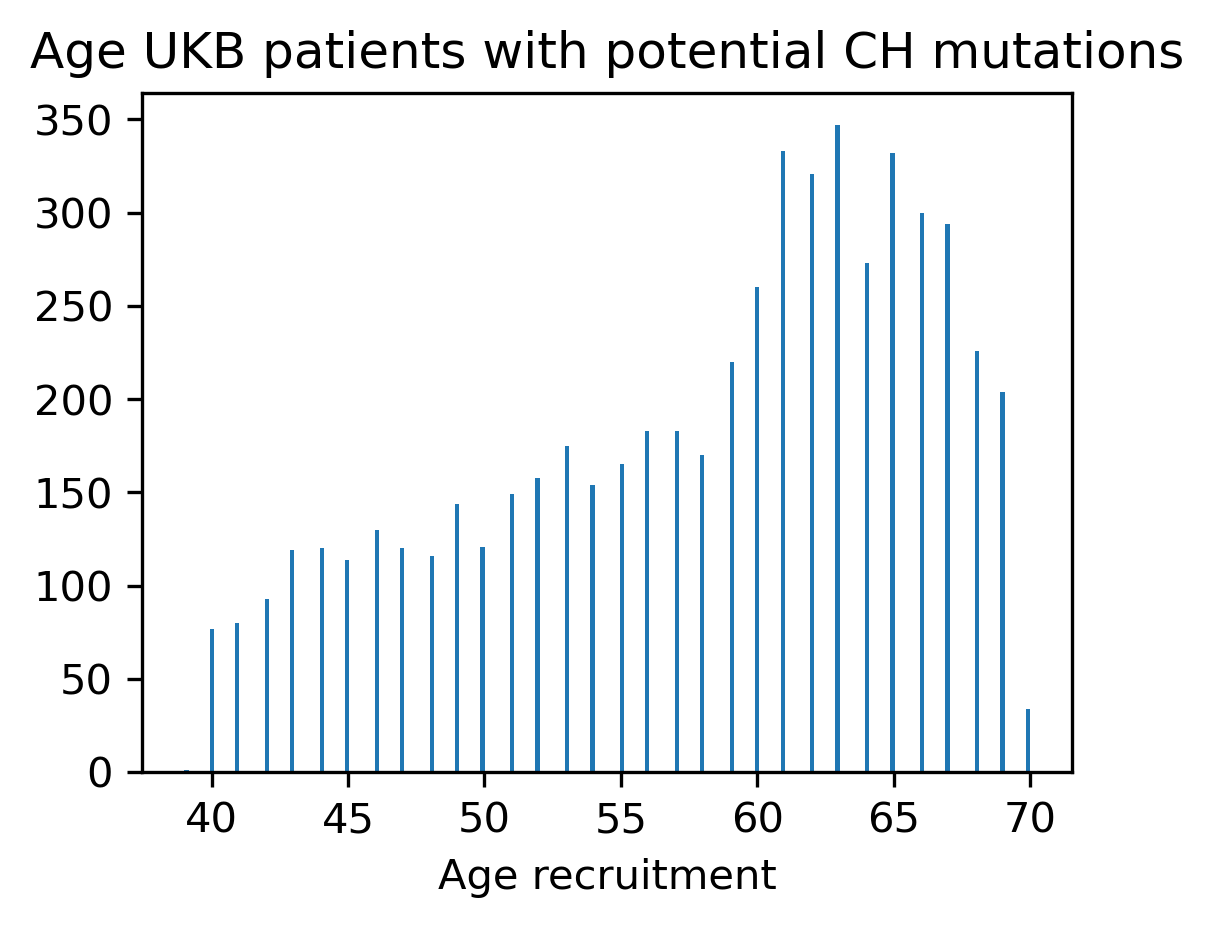

In [32]:
# Histogram

plt.rcParams["figure.figsize"] = (4,3)

plt.hist(age_potCH,200)
plt.title('Age UKB patients with potential CH mutations')
plt.xlabel('Age recruitment')
plt.ylabel('')
plt.show()

In [137]:
### Age group data all WES patients with potential CH mutations

# Create list
agegroup_pot = CH_mutations_50K_filt3_age.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_filt3_age.groupby(['patient', 'age_group']).size().groupby('age_group').size()


age_group
39-45     529
45-50     550
50-55     695
55-60     884
60-65    1374
65-70     897
dtype: int64

In [140]:
### GROUP BY AGE

mut_agegroup_pot = CH_mutations_50K_filt3_age.groupby('age_group').size().tolist()

CH_mutations_50K_filt3_age.groupby('age_group').size()

age_group
39-45     604
45-50     631
50-55     801
55-60    1016
60-65    1606
65-70    1058
dtype: int64

In [138]:
# Proportion of patients with potential CH mutation per age group

res_pot = [round(i / j * 100, 3) for i, j in zip(agegroup_pot, agegroup_all)]
res_pot


[11.543, 11.77, 12.502, 12.968, 14.159, 14.982]

In [141]:
# Mean number of mutations per age group

res = [i / j for i, j in zip(mut_agegroup_pot, agegroup_pot)]
res

[1.1417769376181475,
 1.1472727272727272,
 1.1525179856115109,
 1.1493212669683257,
 1.1688500727802038,
 1.1794871794871795]

([<matplotlib.axis.XTick at 0x2acf789feaf0>,
 [Text(0, 0, '39-45'),
  Text(1, 0, '45-50'),
  Text(2, 0, '50-55'),
  Text(3, 0, '55-60'),
  Text(4, 0, '60-65'),
  Text(5, 0, '65-70')])

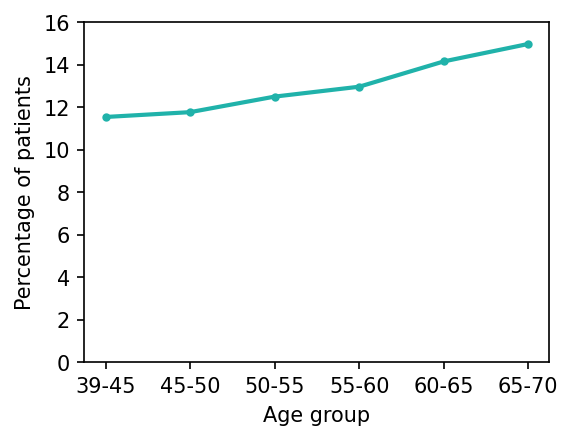

In [112]:
### PLOT

# Age grup labels
age_groups = CH_mutations_50K_filt3_age['age_group'].sort_values().unique()

# Plot
plt.rcParams["figure.figsize"] = (4,3)
plt.plot(res_pot, '.-', color='lightseagreen', linewidth=2)
#plt.title('Percentage of patients with potential CH mutation')
plt.xlabel('Age group')
plt.ylabel('Percentage of patients')
plt.ylim([0,16])
plt.xticks(np.arange(6), age_groups)



In [142]:
### Fisher test

import scipy.stats as stats

# Proportion of patients in group 39-45 (control)
ctrl_pos = agegroup_pot[0]
ctrl_neg = agegroup_all[0] - agegroup_pot[0]

# Empty lists
pvalues = []
oddsrat = []
# Fisher test for each age group
for i in range(6):
    test_pos = agegroup_pot[i]
    test_neg = agegroup_all[i] - agegroup_pot[i]
    oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
    oddsrat.append(oddsratio)
    pvalues.append(pvalue)

#oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
#pvalue

print(oddsrat)
print()
pvalues

[1.0, 0.9781885455442436, 0.9132310924817127, 0.8757779590907366, 0.7910978356955483, 0.7404526077441717]



[1.0,
 0.7460513681347891,
 0.14167577738072296,
 0.023780551358259582,
 1.5068503095745372e-05,
 2.647284050173661e-07]

In [104]:
### Select patients with 2 or more mutations

# Get patient codes
patients_2more = CH_mutations_50K_filt3_age.groupby(['patient']).size().to_frame().reset_index()
patients_2more = patients_2more[patients_2more[0] > 1]['patient']
patients_2more

13      1022811
25      1031924
36      1042623
38      1043045
52      1060171
         ...   
4902    6003503
4903    6003737
4915    6013445
4916    6014607
4918    6017684
Name: patient, Length: 634, dtype: int64

In [105]:
## Get data frame

CH_mutations_50K_filt3_age_2m = CH_mutations_50K_filt3_age[CH_mutations_50K_filt3_age['patient'].isin(patients_2more)]
CH_mutations_50K_filt3_age_2m

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0,age_recruit,age_group
5,1,1804538,.,G,T,0.00,4,38,0.105263,0.894737,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,311,104,A/E,NaN,ENSP00000367872,NaN,NaN,0/0,"34,4,0",15,NaN,NaN,"0,15,1163,102,1175,1262","16,18,2,2",BaseQRankSum=-2.360;DP=38;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,1790932,NaN,NaN,NaN,NaN,53,50-55
6,12,45893659,.,C,A,0.00,3,28,0.107143,0.892857,1,SNV,missense_variant,MODERATE,ARID2,ENST00000334344,5301,1767,H/Q,NaN,ENSP00000335044,NaN,NaN,0/0,"25,3,0",25,NaN,NaN,"0,25,891,75,899,950","14,11,1,2",BaseQRankSum=-2.485;DP=28;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|ARID2|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|ARID2|ENSG0000...,1790932,NaN,NaN,NaN,NaN,53,50-55
7,15,52351420,.,G,T,0.61,4,26,0.153846,0.846154,1,SNV,missense_variant,MODERATE,MYO5A,ENST00000399231,3683,1228,A/D,NaN,ENSP00000382177,NaN,NaN,0/1,"22,4,0",20,NaN,NaN,"20,0,843,86,855,941","17,5,2,2",BaseQRankSum=-3.283;DP=26;ExcessHet=3.0103;MLE...,T|missense_variant|MODERATE|MYO5A|ENSG00000197...,.,CSQ=T|missense_variant|MODERATE|MYO5A|ENSG0000...,1790932,NaN,NaN,NaN,NaN,53,50-55
8,1,1806480,.,T,C,176.77,10,44,0.227273,0.772727,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,262,88,N/D,NaN,ENSP00000367872,NaN,NaN,0/1,"34,10,0",99,NaN,NaN,"205,0,931,307,961,1269","24,10,6,4",BaseQRankSum=1.158;DP=44;ExcessHet=3.0103;MLEA...,CSQ=C|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=C|missense_variant|MODERATE|GNB1|ENSG00000...,3895712,NaN,NaN,NaN,NaN,59,55-60
9,2,25240370,rs776844126,A,T,257.77,16,77,0.207792,0.792208,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2254,752,F/I,rs776844126&COSV53038609&COSV53074109,ENSP00000264709,NaN,NaN,0/1,"61,16,0",99,NaN,NaN,"286,0,2014,469,2062,2531","22,39,8,8",BaseQRankSum=-3.403;DB;DP=79;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,3895712,DNMT3A,752.0,19.0,NaN,59,55-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,X,67546567,.,A,C,94.77,4,40,0.100000,0.900000,1,SNV,missense_variant,MODERATE,AR,ENST00000374690,1421,474,E/A,rs1441671810&CD993480&COSV65959834,ENSP00000363822,NaN,NaN,0/1,"36,4,0",99,0|1,67546565_C_CGGCG,"123,0,1496,230,1517,1748","24,12,3,1",BaseQRankSum=2.480;DP=40;ExcessHet=3.0103;MLEA...,CSQ=C|missense_variant|MODERATE|AR|ENSG0000016...,.,CSQ=C|missense_variant|MODERATE|AR|ENSG0000016...,1762096,NaN,NaN,NaN,NaN,48,45-50
5539,X,67546565,.,C,CG,22.75,4,38,0.105263,0.894737,1,Indel,frameshift_variant,HIGH,AR,ENST00000374690,1419-1420,473-474,-/X,rs1569265261,ENSP00000363822,NaN,NaN,0/1,"34,4,0",60,0|1,67546565_C_CG,"60,0,1529,168,1541,1709","20,14,2,2",BaseQRankSum=0.758;DP=38;ExcessHet=3.0103;MLEA...,CSQ=G|frameshift_variant|HIGH|AR|ENSG000001690...,.,CSQ=G|frameshift_variant|HIGH|AR|ENSG000001690...,6014607,NaN,NaN,NaN,NaN,65,60-65
5540,X,67546567,.,A,C,31.77,4,40,0.100000,0.900000,1,SNV,missense_variant,MODERATE,AR,ENST00000374690,1421,474,E/A,rs1441671810&CD993480&COSV65959834,ENSP00000363822,NaN,NaN,0/1,"36,4,0",60,0|1,67546565_C_CG,"60,0,1529,168,1541,1709","21,15,2,2",BaseQRankSum=1.625;DP=40;ExcessHet=3.0103;MLEA...,CSQ=C|missense_variant|MODERATE|AR|ENSG0000016...,.,CSQ=C|missense_variant|MODERATE|AR|ENSG0000016...,6014607,NaN,NaN,NaN,NaN,65,60-65
5684,X,124071175,.,G,T,0.00,3,32,0.093750,0.906250,1,SNV,missense_variant,MODERATE,STAG2,ENST00000371145,2385,795,L/F,NaN,ENSP00000360187,NaN,NaN,0/0,"29,3,0",65,NaN,NaN,"0,65,908,86,915,936","21,8,3,0",BaseQRankSum=-2.365;DP=32;ExcessHet=3.0103;MLE...,T|missense_v

In [147]:
### Age group data all WES patients with potentil CH mutations

# Create list
agegroup_pot2 = CH_mutations_50K_filt3_age_2m.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_filt3_age_2m.groupby(['patient', 'age_group']).size().groupby('age_group').size()


age_group
39-45     60
45-50     64
50-55     91
55-60    102
60-65    189
65-70    128
dtype: int64

In [148]:
# Proportion of patients with 2+ potential CH mutation per age group

res_pot2 = [round(i / j * 100, 3) for i, j in zip(agegroup_pot2, agegroup_all)]
res_pot2

[1.309, 1.37, 1.637, 1.496, 1.948, 2.138]

([<matplotlib.axis.XTick at 0x2acf79eaff40>,
 [Text(0, 0, '39-45'),
  Text(1, 0, '45-50'),
  Text(2, 0, '50-55'),
  Text(3, 0, '55-60'),
  Text(4, 0, '60-65'),
  Text(5, 0, '65-70')])

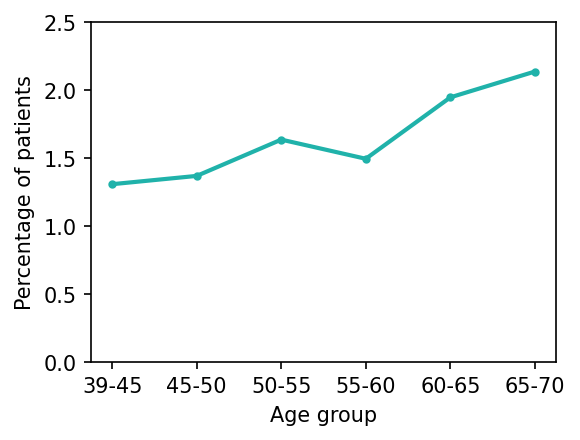

In [149]:
### PLOT


# Plot
plt.rcParams["figure.figsize"] = (4,3)
plt.plot(res_pot2, '.-', color="lightseagreen", linewidth=2)
#plt.title('Percentage of patients with 2+ potential CH mutation')
plt.xlabel('Age group')
plt.ylabel('Percentage of patients')
plt.ylim([0,2.5])
plt.xticks(np.arange(6), age_groups)

In [150]:
### Fisher test

import scipy.stats as stats

ctrl_pos = agegroup_pot2[0]
ctrl_neg = agegroup_all[0] - agegroup_pot2[0]

pvalues = []
oddsrat = []
for i in range(6):
    test_pos = agegroup_pot2[i]
    test_neg = agegroup_all[i] - agegroup_pot2[i]
    oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
    oddsrat.append(oddsratio)
    pvalues.append(pvalue)

#oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
#pvalue

print(oddsrat)
print()
pvalues

[1.0, 0.9553255582577935, 0.7970981041951637, 0.873314172009728, 0.6678388062425206, 0.6072089873977449]



[1.0,
 0.8566192544399237,
 0.18781410508821225,
 0.420942400433023,
 0.006089532908843504,
 0.0013656325997227492]

# AGE IN CH KNOWN MUTATIONS

In [152]:
# Open data

CH_mutations_50K_known = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_MSKCCknown_50k.txt.gz',
                                    sep= '\t')
CH_mutations_50K_known

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size
0,22,28711911,rs752493299,C,T,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant&splice_region_variant,MODERATE,CHEK2,ENST00000382580,919.0,307,A/T,rs752493299,ENSP00000372023,0.000004,0.000000,0/1,"14,2,0",1,NaN,NaN,"1,0,498,43,504,547","13,1,1,1",BaseQRankSum=-1.875;DB;DP=17;ExcessHet=3.0103;...,T|missense_variant&splice_region_variant|MODER...,.,CSQ=T|missense_variant&splice_region_variant|M...,4181038,chr22,28699926.0,C,T,CHEK2,307,missense_variant,1.0
1,2,25240399,rs749282210,C,G,37.77,9,75,0.120000,0.880000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2225.0,742,R/P,rs749282210&COSV53066124,ENSP00000264709,0.000000,0.000000,0/1,"66,9,0",66,NaN,NaN,"66,0,1939,265,1966,2231","35,31,4,5",BaseQRankSum=-0.477;DB;DP=75;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,4471587,chr2,25240399.0,C,G,DNMT3A,742,missense_variant,2.0
2,4,105276128,rs116519313,T,C,241.77,16,99,0.161616,0.838384,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,5618.0,1873,I/T,rs116519313&COSV54396330,ENSP00000442788,0.000013,0.000000,0/1,"83,16,0",99,NaN,NaN,"270,0,2401,518,2449,2967","57,26,10,6",BaseQRankSum=3.114;DB;DP=99;ExcessHet=3.0103;M...,C|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=C|3_prime_UTR_variant&NMD_transcript_varia...,4072725,chr4,105276128.0,T,C,TET2,1873,missense_variant,14.0
3,9,5050713,rs907414891,A,G,0.00,2,19,0.105263,0.894737,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,496.0,166,I/V,rs907414891,ENSP00000371067,NaN,NaN,0/0,"17,2,0",8,0|1,5050706_C_T,"0,8,550,51,556,599","8,9,1,1",BaseQRankSum=-1.722;DB;DP=21;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,4093253,chr9,5050713.0,A,G,JAK2,166,missense_variant,1.0
4,4,105269641,rs775677220,G,A,322.77,14,64,0.218750,0.781250,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4076.0,1359,R/H,rs775677220&COSV54396133,ENSP00000442788,NaN,NaN,0/1,"50,14,0",99,NaN,NaN,"351,0,1575,502,1618,2119","29,21,6,8",BaseQRankSum=1.980;DB;DP=64;ExcessHet=3.0103;M...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4388197,chr4,105269641.0,G,A,TET2,1359,missense_variant,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2,25240359,.,A,C,0.00,9,63,0.142857,0.857143,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2265.0,755,F/L,NaN,ENSP00000264709,NaN,NaN,0/0,"54,9,0",16,NaN,NaN,"0,16,1460,159,1485,1628","25,29,0,9",BaseQRankSum=-2.321;DP=63;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,3848350,chr2,25240361.0,A,C,DNMT3A,755,missense_variant,2.0
1093,11,119277836,.,G,A,0.00,2,29,0.068966,0.931034,1,SNV,missense_variant,MODERATE,CBL,ENST00000264033,1087.0,363,V/M,NaN,ENSP00000264033,NaN,NaN,0/0,"27,2,0",38,NaN,NaN,"0,38,889,81,895,939","8,19,1,1",BaseQRankSum=-1.494;DP=29;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,3822096,chr11,119277836.0,G,A,CBL,363,missense_variant,1.0
1094,2,25240717,rs761064473,C,T,80.77,9,60,0.150000,0.850000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2096.0,699,G/D,rs761064473&COSV53041469,ENSP00000264709,0.000012,0.000009,0/1,"51,9,0",99,NaN,NaN,"109,0,1568,262,1595,1857","14,37,2,7",BaseQRankSum=-1.609;DB;DP=60;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|D

In [153]:
# Merge all potential CH mutations with age

CH_mutations_50K_known_age = pd.merge(CH_mutations_50K_known, age_df,  how='inner', on='patient')


CH_mutations_50K_known_age

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size,age_recruit,age_group
0,22,28711911,rs752493299,C,T,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant&splice_region_variant,MODERATE,CHEK2,ENST00000382580,919.0,307,A/T,rs752493299,ENSP00000372023,0.000004,0.000000,0/1,"14,2,0",1,NaN,NaN,"1,0,498,43,504,547","13,1,1,1",BaseQRankSum=-1.875;DB;DP=17;ExcessHet=3.0103;...,T|missense_variant&splice_region_variant|MODER...,.,CSQ=T|missense_variant&splice_region_variant|M...,4181038,chr22,28699926.0,C,T,CHEK2,307,missense_variant,1.0,61,60-65
1,2,25240399,rs749282210,C,G,37.77,9,75,0.120000,0.880000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2225.0,742,R/P,rs749282210&COSV53066124,ENSP00000264709,0.000000,0.000000,0/1,"66,9,0",66,NaN,NaN,"66,0,1939,265,1966,2231","35,31,4,5",BaseQRankSum=-0.477;DB;DP=75;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,4471587,chr2,25240399.0,C,G,DNMT3A,742,missense_variant,2.0,63,60-65
2,9,5050713,rs907414891,A,G,0.00,2,19,0.105263,0.894737,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,496.0,166,I/V,rs907414891,ENSP00000371067,NaN,NaN,0/0,"17,2,0",8,0|1,5050706_C_T,"0,8,550,51,556,599","8,9,1,1",BaseQRankSum=-1.722;DB;DP=21;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,4093253,chr9,5050713.0,A,G,JAK2,166,missense_variant,1.0,65,60-65
3,4,105269641,rs775677220,G,A,322.77,14,64,0.218750,0.781250,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4076.0,1359,R/H,rs775677220&COSV54396133,ENSP00000442788,NaN,NaN,0/1,"50,14,0",99,NaN,NaN,"351,0,1575,502,1618,2119","29,21,6,8",BaseQRankSum=1.980;DB;DP=64;ExcessHet=3.0103;M...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4388197,chr4,105269641.0,G,A,TET2,1359,missense_variant,3.0,69,65-70
4,20,32434789,rs373221034,C,T,88.77,11,83,0.132530,0.867470,1,SNV,stop_gained,HIGH,ASXL1,ENST00000375687,2077.0,693,R/*,rs373221034&COSV60102332,ENSP00000364839,0.000004,0.000000,0/1,"72,11,0",99,NaN,NaN,"117,0,2380,333,2413,2747","43,29,5,6",BaseQRankSum=-1.435;DB;DP=83;ExcessHet=3.0103;...,T|stop_gained|HIGH|ASXL1|ENSG00000171456|Trans...,.,CSQ=T|stop_gained|HIGH|ASXL1|ENSG00000171456|T...,4421084,chr20,32434789.0,C,T,ASXL1,693,stop_gained,6.0,60,55-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,4,105234636,rs748785984,C,T,110.77,9,57,0.157895,0.842105,1,SNV,stop_gained,HIGH,TET2,ENST00000540549,694.0,232,Q/*,rs748785984&COSV54400796,ENSP00000442788,0.000004,0.000000,0/1,"48,9,0",99,NaN,NaN,"139,0,1934,284,1961,2244","29,19,5,4",BaseQRankSum=-4.808;DB;DP=59;ExcessHet=3.0103;...,T|stop_gained|HIGH|TET2|ENSG00000168769|Transc...,.,CSQ=T|stop_gained&NMD_transcript_variant|HIGH|...,4020229,chr4,105234636.0,C,T,TET2,232,stop_gained,1.0,67,65-70
854,11,119277836,.,G,A,0.00,2,29,0.068966,0.931034,1,SNV,missense_variant,MODERATE,CBL,ENST00000264033,1087.0,363,V/M,NaN,ENSP00000264033,NaN,NaN,0/0,"27,2,0",38,NaN,NaN,"0,38,889,81,895,939","8,19,1,1",BaseQRankSum=-1.494;DP=29;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,3822096,chr11,119277836.0,G,A,CBL,363,missense_variant,1.0,65,60-65
855,2,25240717,rs761064473,C,T,80.77,9,60,0.150000,0.850000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2096.0,699,G/D,rs761064473&COSV53041469,ENSP00000264709,0.000012,0.000009,0/1,"51,9,0",99,NaN,NaN,"109,0,1568,262,1595,1857","14,37,2,7",BaseQRankSum=-1.609;DB;DP=60;Excess

In [203]:
# Patients with potential CH mutation

patients_knownmut = CH_mutations_50K_known_age['patient'].unique()
len(patients_knownmut)

776

In [154]:
### Age data all patients with know CH mutations

age_knownCH = CH_mutations_50K_known_age['age_recruit']

round(age_knownCH.describe(), 2)


count    858.00
mean      59.88
std        7.36
min       40.00
25%       56.00
50%       62.00
75%       65.00
max       70.00
Name: age_recruit, dtype: float64

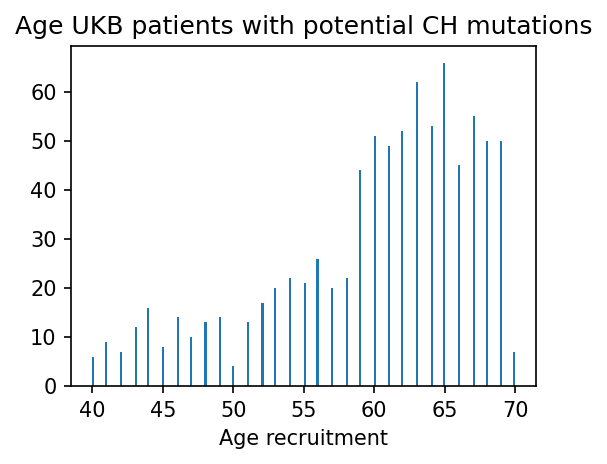

In [155]:
# Histogram

plt.hist(age_knownCH,200)
plt.title('Age UKB patients with potential CH mutations')
plt.xlabel('Age recruitment')
plt.ylabel('')
plt.show()


In [156]:
### Age group data patients with known CH mutation

# Create list
agegroup_known = CH_mutations_50K_known_age.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_known_age.groupby(['patient', 'age_group']).size().groupby('age_group').size()


age_group
39-45     56
45-50     53
50-55     88
55-60    151
60-65    249
65-70    179
dtype: int64

In [157]:
# Mean number of mutations per age group

round(CH_mutations_50K_known_age.groupby(['patient', 'age_group']).size().groupby('age_group').mean(), 3)

age_group
39-45    1.036
45-50    1.038
50-55    1.057
55-60    1.079
60-65    1.133
65-70    1.156
dtype: float64

In [158]:
### Number of mutations in each age group

mut_agegroup_known = CH_mutations_50K_known_age.groupby('age_group').size().tolist()

CH_mutations_50K_known_age.groupby('age_group').size()

age_group
39-45     58
45-50     55
50-55     93
55-60    163
60-65    282
65-70    207
dtype: int64

In [159]:
# Percentage of patients from each group with at leat 1 known CH mutation

res_known = [round(i / j * 100, 2) for i, j in zip(agegroup_known, agegroup_all)]
res_known

[1.22, 1.13, 1.58, 2.22, 2.57, 2.99]

([<matplotlib.axis.XTick at 0x2acf7272ae80>,
 [Text(0, 0, '39-45'),
  Text(1, 0, '45-50'),
  Text(2, 0, '50-55'),
  Text(3, 0, '55-60'),
  Text(4, 0, '60-65'),
  Text(5, 0, '65-70')])

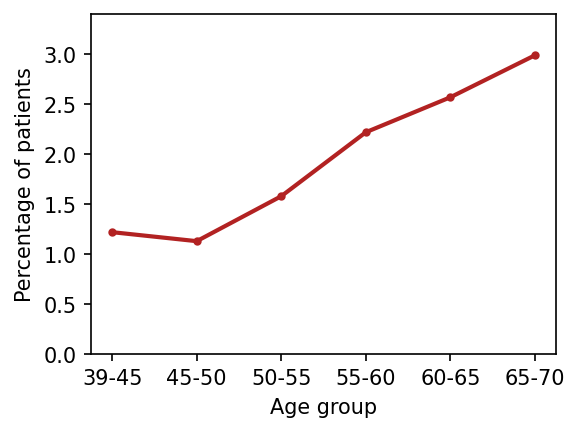

In [160]:
age_groups = CH_mutations_50K_known_age['age_group'].sort_values().unique()

plt.rcParams["figure.figsize"] = (4,3)
plt.plot(res_known, '.-', color="firebrick", linewidth=2)
#plt.title('Percentage of patients with CH known mutation')
plt.xlabel('Age group')
plt.ylabel('Percentage of patients')
plt.ylim([0,3.4])
plt.xticks(np.arange(6), age_groups)

In [161]:
print(agegroup_known)
print(agegroup_all)

[56, 53, 88, 151, 249, 179]
[4583, 4673, 5559, 6817, 9704, 5987]


In [162]:
ctrl_pos = agegroup_known[0]
print(ctrl_pos)
ctrl_neg = agegroup_all[0] - agegroup_known[0]
print(ctrl_neg)
test_pos = agegroup_known[5]
print(test_pos)
test_neg = agegroup_all[5] - agegroup_known[5]
print(test_neg)

56
4527
179
5808


In [57]:
### Fisher test

import scipy.stats as stats

ctrl_pos = agegroup_known[0]
ctrl_neg = agegroup_all[0] - agegroup_known[0]

pvalues = []
oddsrat = []
for i in range(6):
    test_pos = agegroup_known[i]
    test_neg = agegroup_all[i] - agegroup_known[i]
    oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
    oddsrat.append(oddsratio)
    pvalues.append(pvalue)

#oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
#pvalue

print(oddsrat)
print()
pvalues

[1.0, 1.078310014129062, 0.7690623933168664, 0.5460921008167332, 0.46972072074469734, 0.40137573071811217]



[1.0,
 0.7012471752561786,
 0.12982660300063503,
 7.753658363242064e-05,
 7.607349854954319e-08,
 3.644895758274544e-10]

In [165]:
### Select patients with 2 or more mutations

# Get patient codes
patients_2more = CH_mutations_50K_known_age.groupby(['patient']).size().to_frame().reset_index()
patients_2more = patients_2more[patients_2more[0]>1]['patient']
patients_2more


0      1005434
30     1179726
45     1242026
80     1499560
95     1593564
        ...   
734    5768537
742    5823391
760    5966543
762    5978766
769    5996251
Name: patient, Length: 76, dtype: int64

In [166]:
## Get data frame

CH_mutations_50K_known_age_2m = CH_mutations_50K_known_age[CH_mutations_50K_known_age['patient'].isin(patients_2more)]
CH_mutations_50K_known_age_2m


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size,age_recruit,age_group
13,2,25244263,rs769419803,C,T,22.79,10,103,0.097087,0.902913,1,SNV,stop_gained,HIGH,DNMT3A,ENST00000264709,1743.0,581,W/*,rs769419803&COSV53037736&COSV53051300,ENSP00000264709,0.000000,0.000000,0/1,"93,10,0",51,NaN,NaN,"51,0,3259,331,3289,3619","38,55,2,8",BaseQRankSum=-2.837;DB;DP=103;ExcessHet=3.0103...,CSQ=T|stop_gained|HIGH|DNMT3A|ENSG00000119772|...,.,CSQ=T|stop_gained|HIGH|DNMT3A|ENSG00000119772|...,4137060,chr2,25244263.0,C,T,DNMT3A,581,stop_gained,3.0,59,55-60
14,2,25244263,rs769419803,C,T,22.79,10,103,0.097087,0.902913,1,SNV,stop_gained,HIGH,DNMT3A,ENST00000264709,1743.0,581,W/*,rs769419803&COSV53037736&COSV53051300,ENSP00000264709,0.000000,0.000000,0/1,"93,10,0",51,NaN,NaN,"51,0,3259,331,3289,3619","38,55,2,8",BaseQRankSum=-2.837;DB;DP=103;ExcessHet=3.0103...,CSQ=T|stop_gained|HIGH|DNMT3A|ENSG00000119772|...,.,CSQ=T|stop_gained|HIGH|DNMT3A|ENSG00000119772|...,4137060,chr2,25244264.0,C,T,DNMT3A,581,stop_gained,2.0,59,55-60
15,2,25240359,.,A,C,0.00,11,68,0.161765,0.838235,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2265.0,755,F/L,NaN,ENSP00000264709,NaN,NaN,0/0,"57,11,0",8,NaN,NaN,"0,8,1567,167,1596,1755","26,31,0,11",BaseQRankSum=-3.610;DP=68;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,4286629,chr2,25240360.0,A,C,DNMT3A,755,missense_variant,2.0,64,60-65
16,2,25240359,.,A,C,0.00,11,68,0.161765,0.838235,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2265.0,755,F/L,NaN,ENSP00000264709,NaN,NaN,0/0,"57,11,0",8,NaN,NaN,"0,8,1567,167,1596,1755","26,31,0,11",BaseQRankSum=-3.610;DP=68;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,4286629,chr2,25240361.0,A,C,DNMT3A,755,missense_variant,2.0,64,60-65
21,2,25241590,rs754037033,C,T,43.77,8,81,0.098765,0.901235,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2054.0,685,G/E,rs754037033&COSV53039982&COSV53085140,ENSP00000264709,0.000000,0.000000,0/1,"73,8,0",72,NaN,NaN,"72,0,2530,291,2554,2845","38,35,5,3",BaseQRankSum=-2.265;DB;DP=81;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4325888,chr2,25241590.0,C,T,DNMT3A,685,missense_variant,1.0,64,60-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2,25244580,rs752222356,C,A,132.77,12,71,0.169014,0.830986,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,1627.0,543,G/C,rs752222356&COSV53036742,ENSP00000264709,0.000004,0.000009,0/1,"59,12,0",99,NaN,NaN,"161,0,1763,338,1799,2137","32,27,8,4",BaseQRankSum=-1.808;DB;DP=71;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,3719889,chr2,25244580.0,C,A,DNMT3A,543,missense_variant,7.0,61,60-65
848,2,25234373,rs147001633,C,T,78.77,7,43,0.162791,0.837209,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"36,7,0",99,NaN,NaN,"107,0,1148,215,1169,1384","11,25,3,4",BaseQRankSum=1.022;DB;DP=43;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,3925881,chr2,25234373.0,C,T,DNMT3A,882,missense_variant,142.0,65,60-65
849,4,105276221,.,A,G,62.77,7,61,0.114754,0.885246,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,5711.0,1904,H/R,rs1328690101&COSV54397883&COSV54400126,ENSP00000442788,NaN,NaN,0/1,"54,7,0",91,NaN,

In [167]:
### Age group data all WES patients with potentil CH mutations

# Create list
agegroup_known2 = CH_mutations_50K_known_age_2m.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_known_age_2m.groupby(['patient', 'age_group']).size().groupby('age_group').size()


age_group
39-45     2
45-50     2
50-55     5
55-60    11
60-65    30
65-70    26
dtype: int64

In [168]:
# Proportion of patients with 2+ potential CH mutation per age group

res_known2 = [round(i / j * 100, 3) for i, j in zip(agegroup_known2, agegroup_all)]
res_known2


[0.044, 0.043, 0.09, 0.161, 0.309, 0.434]

([<matplotlib.axis.XTick at 0x2acf727c8d00>,
 [Text(0, 0, '39-45'),
  Text(1, 0, '45-50'),
  Text(2, 0, '50-55'),
  Text(3, 0, '55-60'),
  Text(4, 0, '60-65'),
  Text(5, 0, '65-70')])

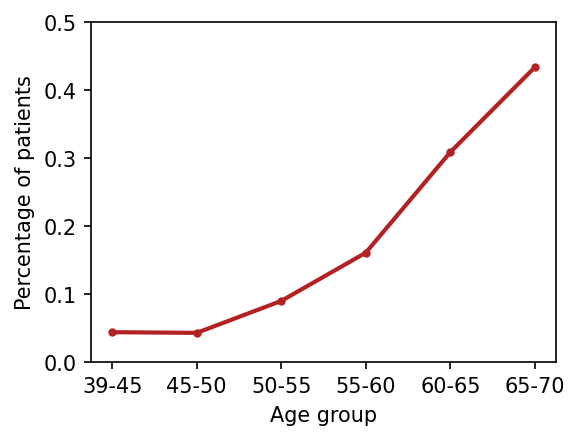

In [170]:
### PLOT

# Plot
plt.rcParams["figure.figsize"] = (4,3)
plt.plot(res_known2, '.-', color="firebrick", linewidth=2)
#plt.title('Percentage of patients with 2+ CH known mutation')
plt.xlabel('Age group')
plt.ylabel('Percentage of patients')
plt.ylim([0,0.5])
plt.xticks(np.arange(6), age_groups)



In [171]:
### Fisher test

import scipy.stats as stats

ctrl_pos = agegroup_known2[0]
ctrl_neg = agegroup_all[0] - agegroup_known2[0]

pvalues = []
oddsrat = []
for i in range(6):
    test_pos = agegroup_known2[i]
    test_neg = agegroup_all[i] - agegroup_known2[i]
    oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
    oddsrat.append(oddsratio)
    pvalues.append(pvalue)

#oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
#pvalue

print(oddsrat)
print()
pvalues

[1.0, 1.0196463654223968, 0.4849596158044095, 0.2701276021511778, 0.1407843993305683, 0.10009571306231424]



[1.0,
 1.0,
 0.4680268767095732,
 0.08927061461479209,
 0.0009132063373781061,
 5.9041056737855224e-05]

### Add filter AD>=3

In [64]:
CH_mutations_50K_known_age3 = CH_mutations_50K_known_age[CH_mutations_50K_known_age['AD_alt']>2]
CH_mutations_50K_known_age3

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size,age_recruit,age_group
1,2,25240399,rs749282210,C,G,37.77,9,75,0.120000,0.880000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2225.0,742,R/P,rs749282210&COSV53066124,ENSP00000264709,0.000000,0.000000,0/1,"66,9,0",66,NaN,NaN,"66,0,1939,265,1966,2231","35,31,4,5",BaseQRankSum=-0.477;DB;DP=75;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,4471587,chr2,25240399.0,C,G,DNMT3A,742,missense_variant,2.0,63,60-65
3,4,105269641,rs775677220,G,A,322.77,14,64,0.218750,0.781250,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4076.0,1359,R/H,rs775677220&COSV54396133,ENSP00000442788,NaN,NaN,0/1,"50,14,0",99,NaN,NaN,"351,0,1575,502,1618,2119","29,21,6,8",BaseQRankSum=1.980;DB;DP=64;ExcessHet=3.0103;M...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4388197,chr4,105269641.0,G,A,TET2,1359,missense_variant,3.0,69,65-70
4,20,32434789,rs373221034,C,T,88.77,11,83,0.132530,0.867470,1,SNV,stop_gained,HIGH,ASXL1,ENST00000375687,2077.0,693,R/*,rs373221034&COSV60102332,ENSP00000364839,0.000004,0.000000,0/1,"72,11,0",99,NaN,NaN,"117,0,2380,333,2413,2747","43,29,5,6",BaseQRankSum=-1.435;DB;DP=83;ExcessHet=3.0103;...,T|stop_gained|HIGH|ASXL1|ENSG00000171456|Trans...,.,CSQ=T|stop_gained|HIGH|ASXL1|ENSG00000171456|T...,4421084,chr20,32434789.0,C,T,ASXL1,693,stop_gained,6.0,60,55-60
5,4,105269677,.,T,A,80.77,6,31,0.193548,0.806452,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4112.0,1371,V/D,rs1434595376&COSV54424662,ENSP00000442788,0.000006,0.000017,0/1,"25,6,0",99,NaN,NaN,"109,0,816,185,834,1018","11,14,3,3",BaseQRankSum=-0.863;DP=31;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4200513,chr4,105269677.0,T,A,TET2,1371,missense_variant,1.0,61,60-65
6,2,25240312,rs757823678,C,T,270.77,15,81,0.185185,0.814815,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2312.0,771,R/Q,rs757823678&COSV53037113&COSV53081931,ENSP00000264709,0.000004,0.000009,0/1,"66,15,0",99,NaN,NaN,"299,0,1885,497,1929,2426","38,28,10,5",BaseQRankSum=1.349;DB;DP=81;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4451505,chr2,25240312.0,C,T,DNMT3A,771,missense_variant,12.0,68,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,2,25234374,rs377577594,G,A,9.31,6,62,0.096774,0.903226,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644.0,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"56,6,0",37,NaN,NaN,"37,0,1700,205,1718,1923","23,33,4,2",BaseQRankSum=0.746;DB;DP=63;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,3884169,chr2,25234374.0,G,A,DNMT3A,882,missense_variant,81.0,66,65-70
853,4,105234636,rs748785984,C,T,110.77,9,57,0.157895,0.842105,1,SNV,stop_gained,HIGH,TET2,ENST00000540549,694.0,232,Q/*,rs748785984&COSV54400796,ENSP00000442788,0.000004,0.000000,0/1,"48,9,0",99,NaN,NaN,"139,0,1934,284,1961,2244","29,19,5,4",BaseQRankSum=-4.808;DB;DP=59;ExcessHet=3.0103;...,T|stop_gained|HIGH|TET2|ENSG00000168769|Transc...,.,CSQ=T|stop_gained&NMD_transcript_variant|HIGH|...,4020229,chr4,105234636.0,C,T,TET2,232,stop_gained,1.0,67,65-70
855,2,25240717,rs761064473,C,T,80.77,9,60,0.150000,0.850000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2096.0,699,G/D,rs761064473&COSV53041469,ENSP00000264709,0.

In [65]:
### Age group data patients with known CH mutation

# Create list
agegroup_known = CH_mutations_50K_known_age3.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_known_age3.groupby(['patient', 'age_group']).size().groupby('age_group').size()

age_group
39-45     28
45-50     32
50-55     56
55-60    104
60-65    185
65-70    147
dtype: int64

In [66]:
# Mean number of mutations per age group

round(CH_mutations_50K_known_age3.groupby(['patient', 'age_group']).size().groupby('age_group').mean(), 3)


age_group
39-45    1.071
45-50    1.062
50-55    1.089
55-60    1.106
60-65    1.162
65-70    1.177
dtype: float64

In [67]:
### Number of mutations in each age group

mut_agegroup_known = CH_mutations_50K_known_age3.groupby('age_group').size().tolist()

CH_mutations_50K_known_age3.groupby('age_group').size()

age_group
39-45     30
45-50     34
50-55     61
55-60    115
60-65    215
65-70    173
dtype: int64

In [68]:
# Percentage of patients from each group with at leat 1 known CH mutation

res_known = [round(i / j * 100, 2) for i, j in zip(agegroup_known, agegroup_all)]
res_known

[0.61, 0.68, 1.01, 1.53, 1.91, 2.46]

([<matplotlib.axis.XTick at 0x2acf794f0730>,
 [Text(0, 0, '39-45'),
  Text(1, 0, '45-50'),
  Text(2, 0, '50-55'),
  Text(3, 0, '55-60'),
  Text(4, 0, '60-65'),
  Text(5, 0, '65-70')])

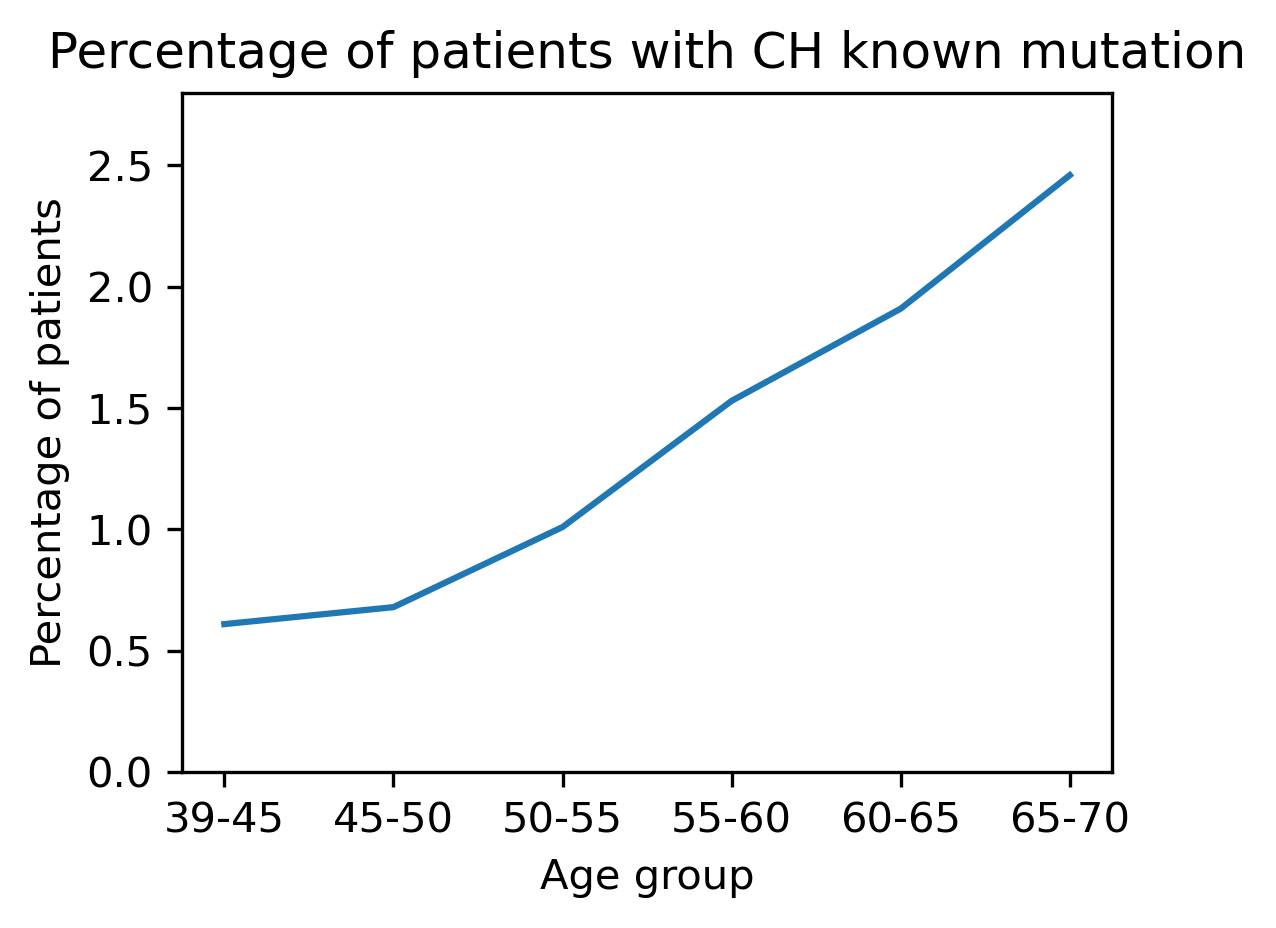

In [69]:
age_groups = CH_mutations_50K_known_age3['age_group'].sort_values().unique()

plt.rcParams["figure.figsize"] = (4,3)
plt.plot(res_known)
plt.title('Percentage of patients with CH known mutation')
plt.xlabel('Age group')
plt.ylabel('Percentage of patients')
plt.ylim([0,2.8])
plt.xticks(np.arange(6), age_groups)


# 3. AGE IN CH KNOWN GENES

In [70]:
# Open data

CH_mutations_50K_knowng = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_knownCHgenes_50k.txt.gz',
                                    sep= '\t')
CH_mutations_50K_knowng

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN
2,1,1787423,.,GC,G,0.00,2,43,0.046512,0.953488,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,930,310,G/X,NaN,ENSP00000367872,NaN,NaN,0/0,"41,2,0",58,NaN,NaN,"0,58,1389,123,1395,1460","18,23,1,1",BaseQRankSum=-1.284;DP=45;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1874879,NaN,NaN,NaN
3,1,1787432,.,AG,A,0.00,2,41,0.048780,0.951220,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,921,307,V/X,NaN,ENSP00000367872,NaN,NaN,0/0,"39,2,0",42,NaN,NaN,"0,42,1413,117,1419,1494","9,30,1,1",BaseQRankSum=-1.361;DP=41;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1850422,NaN,NaN,NaN
4,1,1789053,.,C,T,0.32,2,11,0.181818,0.818182,1,SNV,missense_variant&splice_region_variant,MODERATE,GNB1,ENST00000378609,916,306,G/S,NaN,ENSP00000367872,NaN,NaN,0/1,"9,2,0",17,NaN,NaN,"17,0,311,43,317,360","6,3,1,1",BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4645472,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,9,5126785,.,TG,T,0.01,2,22,0.090909,0.909091,1,Indel,frameshift_variant,HIGH,JAK2,ENST00000381652,3394,1132,G/X,NaN,ENSP00000371067,NaN,NaN,0/1,"20,2,0",9,NaN,NaN,"9,0,682,69,688,757","1,19,1,1",BaseQRankSum=-2.409;DP=22;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|JAK2|ENSG0000009...,.,CSQ=-|frameshift_variant|HIGH|JAK2|ENSG0000009...,4418303,NaN,NaN,NaN
9718,9,5126786,.,G,A,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3394,1132,G/R,NaN,ENSP00000371067,NaN,NaN,0/1,"14,2,0",2,NaN,NaN,"2,0,473,43,479,522","1,13,1,1",BaseQRankSum=-1.556;DP=16;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,5067309,NaN,NaN,NaN
9719,9,5126786,.,G,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3394,1132,G/R,NaN,ENSP00000371067,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,380,43,386,429","1,9,1,1",BaseQRankSum=-1.649;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,2030823,NaN,NaN,NaN
9720,9,5126789,.,T,A,0.01,2,16,0.125000,0.875000,1,SNV,stop_lost,HIGH,JAK2,ENST00000381652,3397,1133,*/R,NaN,ENSP00000371067,NaN,NaN,0/1,"14,2,0",1,NaN,NaN,"1,0,467,43,473,516","1,13,1,1",BaseQRankSum=-1.902;DP=16;ExcessHet=3.0103;MLE...,CSQ=A|stop_lost|HIGH|JAK2|ENSG00000096968|Tran...,.,CSQ=A|stop_lost|HIGH|JAK2|ENSG00000096968|Tran...,2048065,NaN,NaN,NaN


In [71]:
# Merge all CH mutations in known genes with age

CH_mutations_50K_knowng_age = pd.merge(CH_mutations_50K_knowng, age_df,  how='inner', on='patient')


CH_mutations_50K_knowng_age


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,age_recruit,age_group
0,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,51,50-55
1,1,1787423,.,GC,G,0.00,2,43,0.046512,0.953488,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,930,310,G/X,NaN,ENSP00000367872,NaN,NaN,0/0,"41,2,0",58,NaN,NaN,"0,58,1389,123,1395,1460","18,23,1,1",BaseQRankSum=-1.284;DP=45;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1874879,NaN,NaN,NaN,54,50-55
2,1,1787432,.,AG,A,0.00,2,41,0.048780,0.951220,1,Indel,frameshift_variant,HIGH,GNB1,ENST00000378609,921,307,V/X,NaN,ENSP00000367872,NaN,NaN,0/0,"39,2,0",42,NaN,NaN,"0,42,1413,117,1419,1494","9,30,1,1",BaseQRankSum=-1.361;DP=41;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,.,CSQ=-|frameshift_variant|HIGH|GNB1|ENSG0000007...,1850422,NaN,NaN,NaN,60,55-60
3,1,1789053,.,C,T,0.32,2,11,0.181818,0.818182,1,SNV,missense_variant&splice_region_variant,MODERATE,GNB1,ENST00000378609,916,306,G/S,NaN,ENSP00000367872,NaN,NaN,0/1,"9,2,0",17,NaN,NaN,"17,0,311,43,317,360","6,3,1,1",BaseQRankSum=-1.691;DP=11;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4645472,NaN,NaN,NaN,63,60-65
4,1,1789055,.,G,T,0.00,2,28,0.071429,0.928571,1,SNV,missense_variant&splice_region_variant,MODERATE,GNB1,ENST00000378609,914,305,A/E,NaN,ENSP00000367872,NaN,NaN,0/0,"26,2,0",35,NaN,NaN,"0,35,858,78,864,908","19,7,1,1",BaseQRankSum=-1.462;DP=28;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant&splice_region_variant|M...,.,CSQ=T|missense_variant&splice_region_variant|M...,4393267,NaN,NaN,NaN,69,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7304,9,5126784,.,C,A,0.03,2,14,0.142857,0.857143,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3392,1131,A/D,NaN,ENSP00000371067,NaN,NaN,0/1,"12,2,0",7,NaN,NaN,"7,0,434,43,440,483","2,10,1,1",BaseQRankSum=-1.790;DP=14;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,5246976,NaN,NaN,NaN,65,60-65
7305,9,5126785,.,TG,T,0.01,2,22,0.090909,0.909091,1,Indel,frameshift_variant,HIGH,JAK2,ENST00000381652,3394,1132,G/X,NaN,ENSP00000371067,NaN,NaN,0/1,"20,2,0",9,NaN,NaN,"9,0,682,69,688,757","1,19,1,1",BaseQRankSum=-2.409;DP=22;ExcessHet=3.0103;MLE...,CSQ=-|frameshift_variant|HIGH|JAK2|ENSG0000009...,.,CSQ=-|frameshift_variant|HIGH|JAK2|ENSG0000009...,4418303,NaN,NaN,NaN,47,45-50
7306,9,5126786,.,G,A,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3394,1132,G/R,NaN,ENSP00000371067,NaN,NaN,0/1,"14,2,0",2,NaN,NaN,"2,0,473,43,479,522","1,13,1,1",BaseQRankSum=-1.556;DP=16;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,5067309,NaN,NaN,NaN,50,45-50
7307,9,5126786,.,G,A,0.13,2,12,0.166667,0.833333,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3394,1132,G/R,NaN,ENSP00000371067,NaN,NaN,0/1,"10,2,0",13,NaN,NaN,"13,0,380,43,386,429","1,9,1,1",BaseQRankSum=-1.649;DP=12;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,2030823,NaN,NaN,NaN,59,55-60


In [72]:
### Age data all patients mutations in CH genes

age_knowngeneCH = CH_mutations_50K_knowng_age['age_recruit']

round(age_knowngeneCH.describe(), 2)

count    7309.00
mean       57.40
std         8.03
min        39.00
25%        51.00
50%        59.00
75%        64.00
max        70.00
Name: age_recruit, dtype: float64

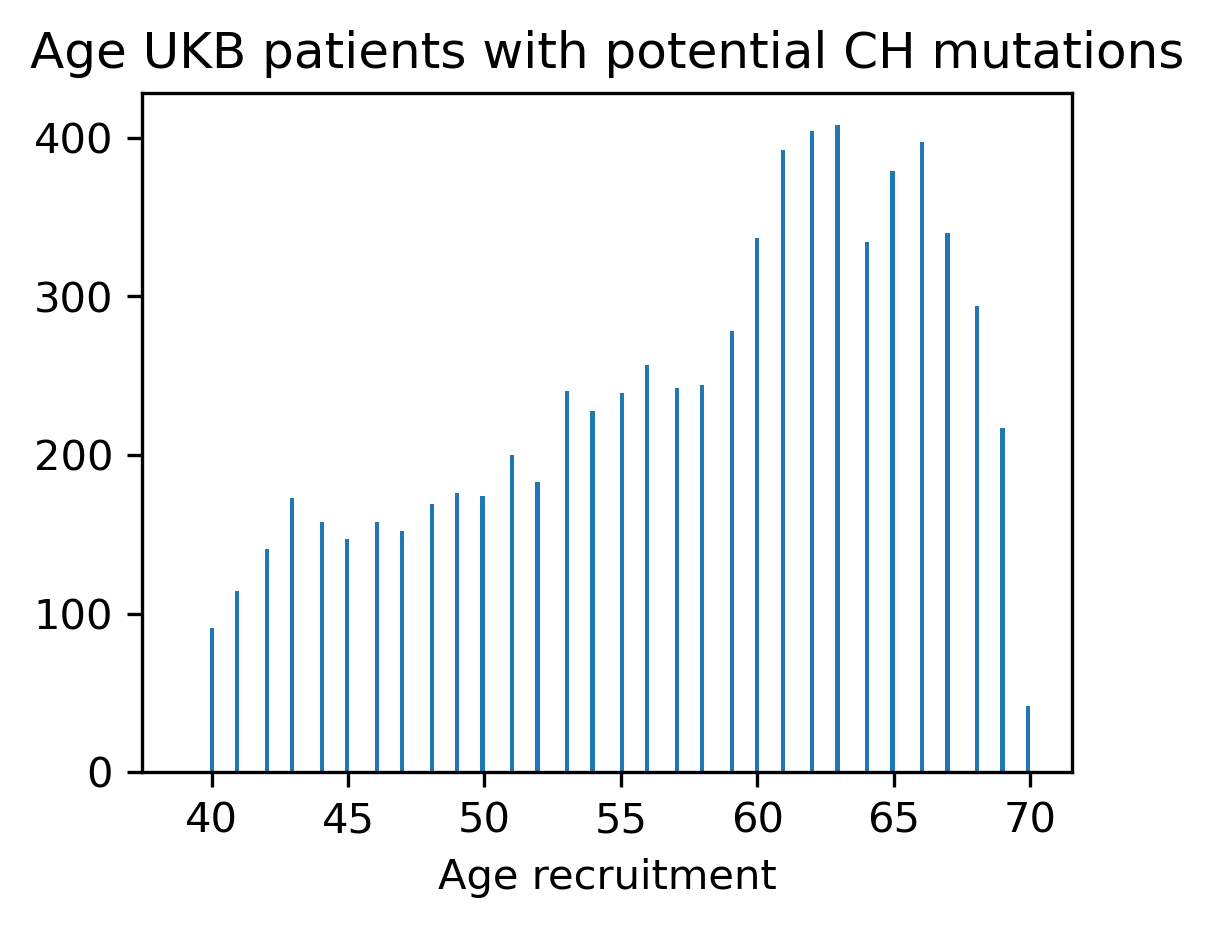

In [73]:
# Histogram

plt.hist(age_knowngeneCH,200)
plt.title('Age UKB patients with potential CH mutations')
plt.xlabel('Age recruitment')
plt.ylabel('')
plt.show()


In [74]:
### Age group data patients with known CH mutation

# Create list
agegroup_known = CH_mutations_50K_knowng_age.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_knowng_age.groupby(['patient', 'age_group']).size().groupby('age_group').size()


age_group
39-45     736
45-50     738
50-55     957
55-60    1176
60-65    1656
65-70    1136
dtype: int64

In [75]:
# Mean number of mutations per age group

round(CH_mutations_50K_knowng_age.groupby(['patient', 'age_group']).size().groupby('age_group').mean(), 3)


age_group
39-45    1.121
45-50    1.123
50-55    1.139
55-60    1.155
60-65    1.158
65-70    1.136
dtype: float64

In [76]:
### Number of mutations in each age group

mut_agegroup_known = CH_mutations_50K_known_age.groupby('age_group').size().tolist()

CH_mutations_50K_known_age.groupby('age_group').size()

#res = [i / j for i, j in zip(mut_agegroup_known, agegroup_known)]
#res

age_group
39-45     58
45-50     55
50-55     93
55-60    163
60-65    282
65-70    207
dtype: int64

In [77]:
# Percentage of patients from each group with at leat 1 known CH mutation

res_knowng = [round(i / j * 100, 3) for i, j in zip(agegroup_known, agegroup_all)]
res_knowng

[16.059, 15.793, 17.215, 17.251, 17.065, 18.974]

([<matplotlib.axis.XTick at 0x2acf66c42460>,
 [Text(0, 0, '39-45'),
  Text(1, 0, '45-50'),
  Text(2, 0, '50-55'),
  Text(3, 0, '55-60'),
  Text(4, 0, '60-65'),
  Text(5, 0, '65-70')])

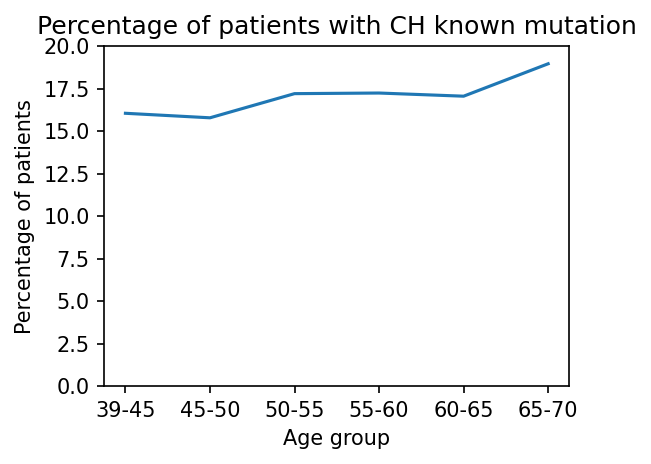

In [78]:
mpl.rcParams['figure.dpi']= 150
age_groups = CH_mutations_50K_known_age['age_group'].sort_values().unique()

plt.rcParams["figure.figsize"] = (4,3)
plt.plot(res_knowng)
plt.title('Percentage of patients with CH known mutation')
plt.xlabel('Age group')
plt.ylabel('Percentage of patients')
plt.ylim([0,20])
plt.xticks(np.arange(6), age_groups)

## Add filter DNMT3A & AD>=3

In [174]:
# Open data

CH_mutations_50K_knowng3 = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_knownCHgenes_50k_3.txt.gz',
                                    sep= '\t')
CH_mutations_50K_knowng3

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0
0,1,1787345,.,T,G,0.00,8,49,0.163265,0.836735,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"41,8,0",9,NaN,NaN,"0,9,955,118,977,1086","28,13,8,0",BaseQRankSum=-2.388;DP=49;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,1075571,NaN,NaN,NaN,NaN
1,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,NaN
2,1,1789086,.,T,A,214.77,9,33,0.272727,0.727273,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,883,295,N/Y,NaN,ENSP00000367872,NaN,NaN,0/1,"24,9,0",99,NaN,NaN,"243,0,782,315,809,1124","17,7,7,2",BaseQRankSum=-1.131;DP=33;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,3929969,NaN,NaN,NaN,NaN
3,1,1789110,.,C,T,0.00,4,45,0.088889,0.911111,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,859,287,A/T,NaN,ENSP00000367872,NaN,NaN,0/0,"41,4,0",51,NaN,NaN,"0,51,1338,123,1349,1422","25,16,2,2",BaseQRankSum=-2.379;DP=45;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,2932449,NaN,NaN,NaN,NaN
4,1,1804420,.,T,C,2.44,3,19,0.157895,0.842105,1,SNV,splice_region_variant&synonymous_variant,LOW,GNB1,ENST00000378609,429,143,T,NaN,ENSP00000367872,NaN,NaN,0/1,"16,3,0",27,NaN,NaN,"27,0,498,75,507,582","10,6,1,2",BaseQRankSum=-1.352;DP=20;ExcessHet=3.0103;MLE...,CSQ=C|splice_region_variant&synonymous_variant...,.,CSQ=C|splice_region_variant&synonymous_variant...,1119016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,9,5126359,.,C,A,0.13,3,25,0.120000,0.880000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3204,1068,D/E,NaN,ENSP00000371067,NaN,NaN,0/1,"22,3,0",13,NaN,NaN,"13,0,713,79,722,801","15,7,1,2",BaseQRankSum=-1.435;DP=25;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,4700951,NaN,NaN,NaN,NaN
1994,9,5126363,.,C,A,0.00,3,26,0.115385,0.884615,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3208,1070,Q/K,NaN,ENSP00000371067,NaN,NaN,0/0,"23,3,0",4,NaN,NaN,"0,4,735,69,744,809","16,7,2,1",BaseQRankSum=-1.852;DP=26;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,4135285,NaN,NaN,NaN,NaN
1995,9,5126696,.,A,G,53.77,4,20,0.200000,0.800000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3304,1102,M/V,NaN,ENSP00000371067,NaN,NaN,0/1,"16,4,0",82,NaN,NaN,"82,0,496,130,508,638","10,6,3,1",BaseQRankSum=-0.335;DP=20;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,2033706,NaN,NaN,NaN,NaN
1996,9,5126745,.,A,T,22.79,4,26,0.153846,0.846154,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3353,1118,D/V,NaN,ENSP00000371067,NaN,NaN,0/1,"22,4,0",51,NaN,NaN,"51,0,653,117,665,782","8,14,1,3",BaseQRankSum=0.555;DP=26;ExcessHet=3.0103;MLEA...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,2012410,NaN,NaN,NaN,NaN


In [175]:
# Merge all CH mutations in known genes with age

CH_mutations_50K_knowng_age3 = pd.merge(CH_mutations_50K_knowng3, age_df,  how='inner', on='patient')


CH_mutations_50K_knowng_age3

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0,age_recruit,age_group
0,1,1787345,.,T,G,0.00,7,52,0.134615,0.865385,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,1009,337,K/Q,NaN,ENSP00000367872,NaN,NaN,0/0,"45,7,0",50,NaN,NaN,"0,50,1376,133,1394,1477","33,12,7,0",BaseQRankSum=-2.649;DP=53;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|GNB1|ENSG00000...,2577054,NaN,NaN,NaN,NaN,51,50-55
1,1,1789086,.,T,A,214.77,9,33,0.272727,0.727273,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,883,295,N/Y,NaN,ENSP00000367872,NaN,NaN,0/1,"24,9,0",99,NaN,NaN,"243,0,782,315,809,1124","17,7,7,2",BaseQRankSum=-1.131;DP=33;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,3929969,NaN,NaN,NaN,NaN,63,60-65
2,1,1789110,.,C,T,0.00,4,45,0.088889,0.911111,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,859,287,A/T,NaN,ENSP00000367872,NaN,NaN,0/0,"41,4,0",51,NaN,NaN,"0,51,1338,123,1349,1422","25,16,2,2",BaseQRankSum=-2.379;DP=45;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,2932449,NaN,NaN,NaN,NaN,61,60-65
3,1,1804420,.,T,C,2.44,3,19,0.157895,0.842105,1,SNV,splice_region_variant&synonymous_variant,LOW,GNB1,ENST00000378609,429,143,T,NaN,ENSP00000367872,NaN,NaN,0/1,"16,3,0",27,NaN,NaN,"27,0,498,75,507,582","10,6,1,2",BaseQRankSum=-1.352;DP=20;ExcessHet=3.0103;MLE...,CSQ=C|splice_region_variant&synonymous_variant...,.,CSQ=C|splice_region_variant&synonymous_variant...,1119016,NaN,NaN,NaN,NaN,64,60-65
4,1,1804464,.,G,T,0.00,4,50,0.080000,0.920000,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,385,129,R/S,NaN,ENSP00000367872,NaN,NaN,0/0,"46,4,0",51,NaN,NaN,"0,51,1534,138,1546,1633","18,28,2,2",BaseQRankSum=-2.468;DP=50;ExcessHet=3.0103;MLE...,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|GNB1|ENSG00000...,5983217,NaN,NaN,NaN,NaN,56,55-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,9,5123090,.,C,A,0.00,3,33,0.090909,0.909091,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3146,1049,T/K,COSV67604641,ENSP00000371067,NaN,NaN,0/0,"30,3,0",39,NaN,NaN,"0,39,1130,90,1138,1189","10,20,1,2",BaseQRankSum=-2.431;DP=34;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,5300347,NaN,NaN,NaN,NaN,55,50-55
1567,9,5126359,.,C,A,0.13,3,25,0.120000,0.880000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3204,1068,D/E,NaN,ENSP00000371067,NaN,NaN,0/1,"22,3,0",13,NaN,NaN,"13,0,713,79,722,801","15,7,1,2",BaseQRankSum=-1.435;DP=25;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|JAK2|ENSG00000...,4700951,NaN,NaN,NaN,NaN,63,60-65
1568,9,5126696,.,A,G,53.77,4,20,0.200000,0.800000,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3304,1102,M/V,NaN,ENSP00000371067,NaN,NaN,0/1,"16,4,0",82,NaN,NaN,"82,0,496,130,508,638","10,6,3,1",BaseQRankSum=-0.335;DP=20;ExcessHet=3.0103;MLE...,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,2033706,NaN,NaN,NaN,NaN,63,60-65
1569,9,5126745,.,A,T,22.79,4,26,0.153846,0.846154,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,3353,1118,D/V,NaN,ENSP00000371067,NaN,NaN,0/1,"22,4,0",51,NaN,NaN,"51,0,653,117,665,782","8,14,1,3",BaseQRankSum=0.555;DP=26;ExcessHet=3.0103;MLEA...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,2012410,NaN,NaN,NaN,NaN,56,55-60


In [202]:
# Patients with potential CH mutation

patients_knowngene = CH_mutations_50K_knowng_age3['patient'].unique()
len(patients_knowngene)

1468

In [176]:
### Age data all patients mutations in CH genes

age_knowngeneCH = CH_mutations_50K_knowng_age3['age_recruit']

round(age_knowngeneCH.describe(), 2)

count    1571.00
mean       59.36
std         7.51
min        39.00
25%        55.00
50%        61.00
75%        65.00
max        70.00
Name: age_recruit, dtype: float64

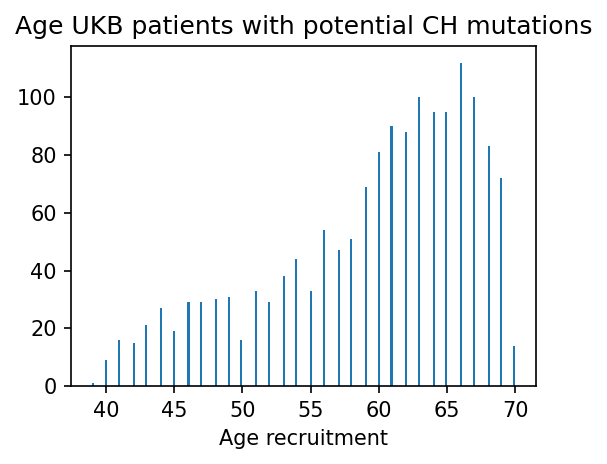

In [177]:
# Histogram

plt.hist(age_knowngeneCH,200)
plt.title('Age UKB patients with potential CH mutations')
plt.xlabel('Age recruitment')
plt.ylabel('')
plt.show()

In [178]:
### Age group data patients with known CH mutation

# Create list
agegroup_knowng = CH_mutations_50K_knowng_age3.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_knowng_age3.groupby(['patient', 'age_group']).size().groupby('age_group').size()



age_group
39-45    105
45-50    128
50-55    162
55-60    281
60-65    434
65-70    358
dtype: int64

In [179]:
# Mean number of mutations per age group

round(CH_mutations_50K_knowng_age3.groupby(['patient', 'age_group']).size().groupby('age_group').mean(), 3)


age_group
39-45    1.029
45-50    1.055
50-55    1.093
55-60    1.075
60-65    1.078
65-70    1.064
dtype: float64

In [180]:
### Number of mutations in each age group

mut_agegroup_knowng = CH_mutations_50K_knowng_age.groupby('age_group').size().tolist()

CH_mutations_50K_knowng_age.groupby('age_group').size()

age_group
39-45     825
45-50     829
50-55    1090
55-60    1358
60-65    1917
65-70    1290
dtype: int64

In [181]:
# Percentage of patients from each group with at leat 1 known CH mutation

res_knowng = [round(i / j * 100, 3) for i, j in zip(agegroup_knowng, agegroup_all)]
res_knowng

[2.291, 2.739, 2.914, 4.122, 4.472, 5.98]

([<matplotlib.axis.XTick at 0x2acf72cade20>,
 [Text(0, 0, '39-45'),
  Text(1, 0, '45-50'),
  Text(2, 0, '50-55'),
  Text(3, 0, '55-60'),
  Text(4, 0, '60-65'),
  Text(5, 0, '65-70')])

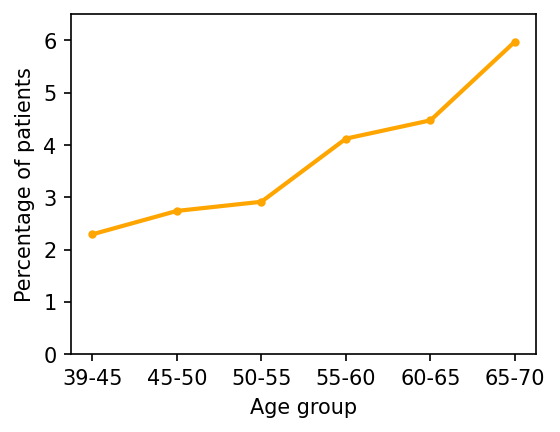

In [182]:
age_groups = CH_mutations_50K_knowng_age['age_group'].sort_values().unique()

plt.rcParams["figure.figsize"] = (4,3)
plt.plot(res_knowng, '.-', color="orange", linewidth=2)
#plt.title('% patients with CH mutations in known CH genes')
plt.xlabel('Age group')
plt.ylabel('Percentage of patients')
plt.ylim([0,6.5])
plt.xticks(np.arange(6), age_groups)

In [190]:
### Fisher test

import scipy.stats as stats

ctrl_pos = agegroup_knowng[0]
ctrl_neg = agegroup_all[0] - agegroup_knowng[0]

pvalues = []
oddsrat = []
for i in range(6):
    test_pos = agegroup_knowng[i]
    test_neg = agegroup_all[i] - agegroup_knowng[i]
    oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
    oddsrat.append(oddsratio)
    pvalues.append(pvalue)

#oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
#pvalue

print(oddsrat)
print()
pvalues

[1.0, 0.8325860456677088, 0.7811647064661803, 0.5453947253396995, 0.5008356265037676, 0.3686832709135413]



[1.0,
 0.18442751631684667,
 0.05341967584295597,
 8.096986558006933e-08,
 3.3843805682561403e-11,
 2.393152028879564e-21]

In [184]:
### Select patients with 2 or more mutations

# Get patient codes
patients_2more = CH_mutations_50K_knowng_age3.groupby(['patient']).size().to_frame().reset_index()
patients_2more = patients_2more[patients_2more[0]>1]['patient']
patients_2more

17      1060746
18      1064088
29      1084949
66      1224092
68      1231680
         ...   
1448    5936027
1451    5966543
1457    5985065
1461    5996251
1463    6003737
Name: patient, Length: 95, dtype: int64

In [185]:
## Get data frame

CH_mutations_50K_knowng_age3_2m = CH_mutations_50K_knowng_age3[CH_mutations_50K_knowng_age3['patient'].isin(patients_2more)]
CH_mutations_50K_knowng_age3_2m


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Hugo_Symbol,Protein_position,Number_mutations,0,age_recruit,age_group
6,1,1806480,.,T,C,176.77,10,44,0.227273,0.772727,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,262,88,N/D,NaN,ENSP00000367872,NaN,NaN,0/1,"34,10,0",99,NaN,NaN,"205,0,931,307,961,1269","24,10,6,4",BaseQRankSum=1.158;DP=44;ExcessHet=3.0103;MLEA...,CSQ=C|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=C|missense_variant|MODERATE|GNB1|ENSG00000...,3895712,NaN,NaN,NaN,NaN,59,55-60
7,2,25240370,rs776844126,A,T,257.77,16,77,0.207792,0.792208,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2254,752,F/I,rs776844126&COSV53038609&COSV53074109,ENSP00000264709,NaN,NaN,0/1,"61,16,0",99,NaN,NaN,"286,0,2014,469,2062,2531","22,39,8,8",BaseQRankSum=-3.403;DB;DP=79;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,3895712,DNMT3A,752.0,19.0,NaN,59,55-60
8,1,1815775,.,G,A,6.02,4,22,0.181818,0.818182,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,184,62,H/Y,NaN,ENSP00000367872,NaN,NaN,0/1,"18,4,0",33,NaN,NaN,"33,0,658,87,670,756","13,5,2,2",BaseQRankSum=-2.761;DP=22;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=A|missense_variant|MODERATE|GNB1|ENSG00000...,3163476,NaN,NaN,NaN,NaN,53,50-55
9,4,105241428,.,A,G,0.25,4,39,0.102564,0.897436,1,SNV,missense_variant&splice_region_variant,MODERATE,TET2,ENST00000540549,3499,1167,R/G,rs1356919272&COSV54428993,ENSP00000442788,0.000007,0.0,0/1,"35,4,0",16,NaN,NaN,"16,0,1093,121,1105,1226","18,17,2,2",BaseQRankSum=0.426;DP=39;ExcessHet=3.0103;MLEA...,G|missense_variant&splice_region_variant|MODER...,.,CSQ=G|intron_variant&NMD_transcript_variant|MO...,3163476,TET2,1167.0,6.0,NaN,53,50-55
10,1,1815784,.,A,C,0.00,5,28,0.178571,0.821429,1,SNV,missense_variant,MODERATE,GNB1,ENST00000378609,175,59,Y/D,NaN,ENSP00000367872,NaN,NaN,0/0,"23,5,0",32,NaN,NaN,"0,32,585,66,598,633","16,7,5,0",BaseQRankSum=-1.960;DP=28;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|GNB1|ENSG00000...,.,CSQ=C|missense_variant|MODERATE|GNB1|ENSG00000...,1595191,NaN,NaN,NaN,NaN,53,50-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,4,105275380,.,C,T,58.77,5,32,0.156250,0.843750,1,SNV,stop_gained,HIGH,TET2,ENST00000540549,4870,1624,Q/*,COSV54402066,ENSP00000442788,NaN,NaN,0/1,"27,5,0",87,NaN,NaN,"87,0,985,168,1000,1168","16,11,2,3",BaseQRankSum=-2.507;DP=32;ExcessHet=3.0103;MLE...,T|stop_gained|HIGH|TET2|ENSG00000168769|Transc...,.,CSQ=T|3_prime_UTR_variant&NMD_transcript_varia...,2599505,NaN,NaN,NaN,NaN,65,60-65
1442,4,105275241,.,TCC,T,190.73,6,28,0.214286,0.785714,1,Indel,frameshift_variant,HIGH,TET2,ENST00000540549,4732-4733,1578,P/X,NaN,ENSP00000442788,NaN,NaN,0/1,"22,6,0",99,0|1,105275241_TCC_T,"228,0,3428,294,3450,3744","7,15,0,6",BaseQRankSum=0.201;DP=28;ExcessHet=3.0103;MLEA...,-|frameshift_variant|HIGH|TET2|ENSG00000168769...,.,CSQ=-|3_prime_UTR_variant&NMD_transcript_varia...,3607371,NaN,NaN,NaN,NaN,61,60-65
1443,4,105275247,.,TCCAAACTC,T,181.73,7,31,0.225806,0.774194,1,Indel,frameshift_variant,HIGH,TET2,ENST00000540549,4738-4745,1580-1582,PNS/X,NaN,ENSP00000442788,NaN,NaN,0/1,"24,7,0",99,0|1,105275241_TCC_T,"219,0,3742,294,3763,4057","9,15,0,7",BaseQRankSum=3.340;DP=31;ExcessHet=3.0103;MLEA...,-|frameshift_variant|HIGH|TET2|ENSG00000168769...,.,CSQ=-|3_prime_UTR_variant&NMD_transcript_varia...,3607371,NaN,NaN,NaN,NaN,61,60-65
1469,4,105275900,.,T,TC,229.73,12,87,0.137931,0.862069,1,Indel,frameshift_variant,HIGH,TET2,ENST00000540549,5390-5391,1797,L/FX,NaN,ENSP00000442788,NaN,NaN,0/1,"75,12,0",99,0|1,105275900_T_TC,"267,0,5261,499,5297,5796","41,34,6,6",BaseQRankSum=4.016;DP=87;ExcessHet=3.010

In [186]:
### Age group data all WES patients with potentil CH mutations

# Create list
agegroup_knowng2 = CH_mutations_50K_knowng_age3_2m.groupby(['patient', 'age_group']).size().groupby('age_group').size().tolist()

# Show result
CH_mutations_50K_knowng_age3_2m.groupby(['patient', 'age_group']).size().groupby('age_group').size()


age_group
39-45     3
45-50     7
50-55    14
55-60    17
60-65    32
65-70    22
dtype: int64

In [188]:
# Proportion of patients with 2+ potential CH mutation per age group

res_knowng2 = [round(i / j * 100, 3) for i, j in zip(agegroup_knowng2, agegroup_all)]
res_knowng2

[0.065, 0.15, 0.252, 0.249, 0.33, 0.367]

([<matplotlib.axis.XTick at 0x2acf72d11160>,
 [Text(0, 0, '39-45'),
  Text(1, 0, '45-50'),
  Text(2, 0, '50-55'),
  Text(3, 0, '55-60'),
  Text(4, 0, '60-65'),
  Text(5, 0, '65-70')])

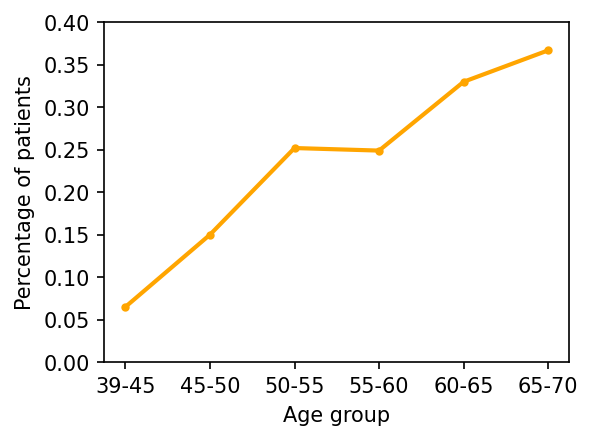

In [189]:
### PLOT

# Plot
plt.rcParams["figure.figsize"] = (4,3)
plt.plot(res_knowng2, '.-', color="orange", linewidth=2)
#plt.title('Percentage of patients with 2+ known CH genes')
plt.xlabel('Age group')
plt.ylabel('Percentage of patients')
plt.ylim([0,0.4])
plt.xticks(np.arange(6), age_groups)


In [191]:
### Fisher test

import scipy.stats as stats

ctrl_pos = agegroup_knowng2[0]
ctrl_neg = agegroup_all[0] - agegroup_knowng2[0]

pvalues = []
oddsrat = []
for i in range(6):
    test_pos = agegroup_knowng2[i]
    test_neg = agegroup_all[i] - agegroup_knowng2[i]
    oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
    oddsrat.append(oddsratio)
    pvalues.append(pvalue)

#oddsratio, pvalue = stats.fisher_exact([[ctrl_pos, test_pos], [ctrl_neg, test_neg]])
#pvalue

print(oddsrat)
print()
pvalues

[1.0, 0.4366188396756082, 0.2594354335620711, 0.26200873362445415, 0.19798034934497816, 0.17760023818975784]



[1.0,
 0.34371684771101163,
 0.0266469739367506,
 0.02197507515224656,
 0.0017056147894368668,
 0.0010209657021143037]

# BOXPLOT

In [217]:
# Transform group of patients to sets

patients_all = set(patients_all)
patients_potCH = set(patients_potCH)
patients_knownmut = set(patients_knownmut)
patients_knowngene = set(patients_knowngene)

In [225]:
# Chenck number of patients

print(len(patients_all))
print(len(patients_potCH))
print(len(patients_knowngene))
print(len(patients_knownmut))

37323
4929
1468
776


In [223]:
# Define groups

patients_NoMut = patients_all - patients_potCH - patients_knownmut - patients_knowngene
print(len(patients_NoMut))

patients_potNOTknown = patients_potCH - patients_knownmut - patients_knowngene
print(len(patients_potNOTknown))

32210
3388


In [226]:
age_df

,patient,age_recruit,age_group
0,1000019,54,50-55
1,1000022,53,50-55
2,1000035,59,55-60
3,1000046,45,39-45
4,1000054,65,60-65
...,...,...,...
502480,6024829,65,60-65
502481,6024837,61,60-65
502482,6024841,47,45-50
502483,6024853,54,50-55


In [260]:
# Take ages

age_NoMut = age_df[age_df['patient'].isin(patients_NoMut)]['age_recruit']
age_CH_pot = age_df[age_df['patient'].isin(patients_potCH)]['age_recruit']
age_CH_notknown = age_df[age_df['patient'].isin(patients_potNOTknown)]['age_recruit']
age_CH_knowngene = age_df[age_df['patient'].isin(patients_knowngene)]['age_recruit']
age_CH_knownmut = age_df[age_df['patient'].isin(patients_knownmut)]['age_recruit']

[Text(1, 0, 'No CH'),
 Text(2, 0, 'NOT-known CH'),
 Text(3, 0, 'Potential CH'),
 Text(4, 0, 'CH know genes'),
 Text(5, 0, 'Known CH mut')]

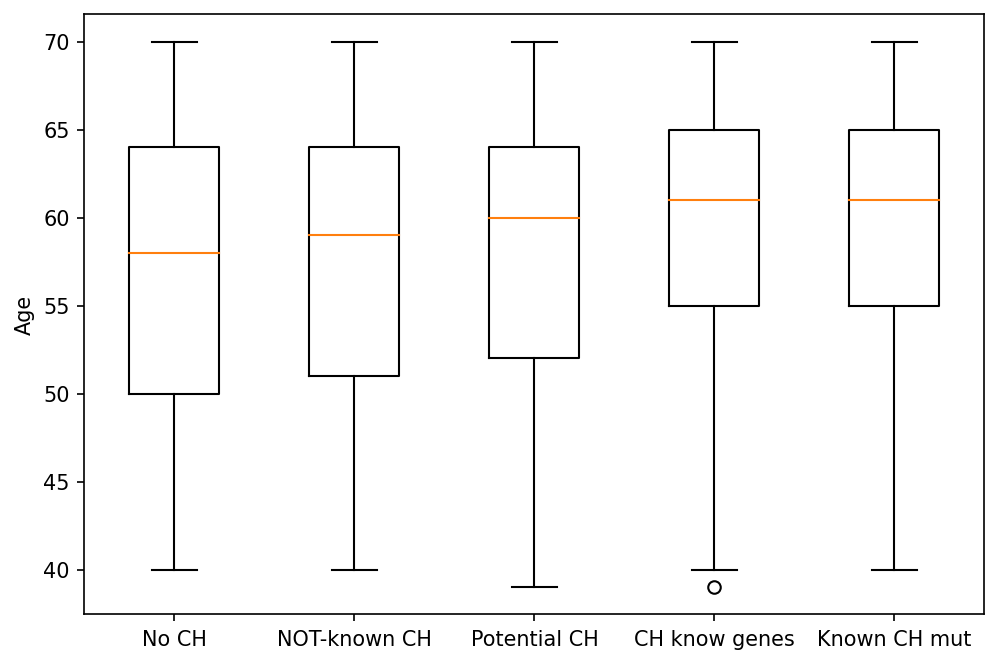

In [264]:
plt.rcParams["figure.figsize"] = (6,4)

fig = plt.figure(figsize =(6, 4))
ax = fig.add_axes([0, 0, 1, 1])

plt.boxplot([age_NoMut, age_CH_notknown, age_CH_pot, age_CH_knowngene, age_CH_knownmut])
#plt.xlabel('Group')
plt.ylabel('Age')

ax.set_xticklabels(['No CH', 'NOT-known CH', 'Potential CH', 
                    'CH know genes', 'Known CH mut'])


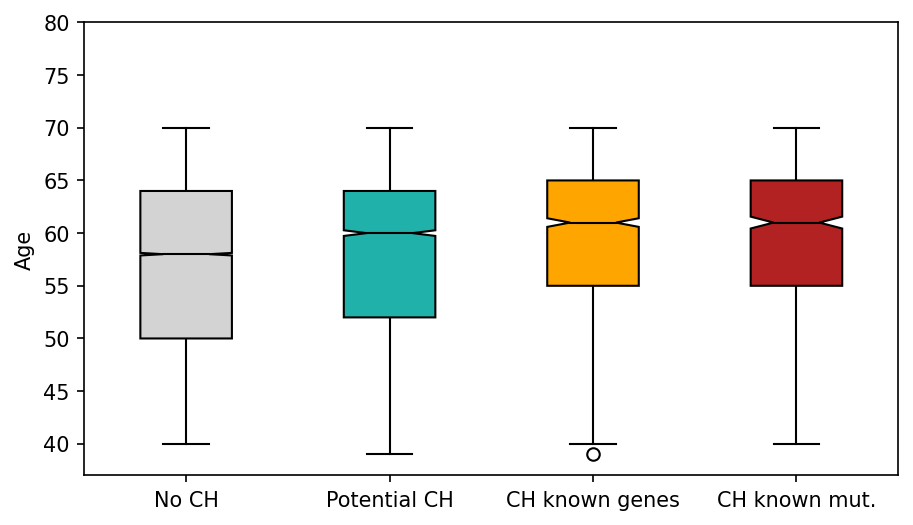

In [315]:
plt.rcParams["figure.figsize"] = (7,4)

fig, ax = plt.subplots()
box = ax.boxplot([age_NoMut, age_CH_pot, age_CH_knowngene, age_CH_knownmut],
                 notch=True, patch_artist=True, medianprops=dict(color='black'))

plt.ylabel('Age')

ax.set_xticklabels(['No CH', 'Potential CH', 
                    'CH known genes', 'CH known mut.'])
ax.set_ylim([37,80])

colors = ['lightgray', 'lightseagreen','orange','firebrick']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


In [266]:
# T test

print(stats.ttest_ind(age_NoMut,age_CH_notknown))
print()
print(stats.ttest_ind(age_NoMut,age_CH_pot))
print(stats.ttest_ind(age_NoMut,age_CH_knowngene))
print(stats.ttest_ind(age_NoMut,age_CH_knownmut))
print()
print(stats.ttest_ind(age_CH_pot,age_CH_knowngene))
print(stats.ttest_ind(age_CH_pot,age_CH_knownmut))
print()
print(stats.ttest_ind(age_CH_notknown,age_CH_knowngene))
print(stats.ttest_ind(age_CH_notknown,age_CH_knownmut))
print()
print(stats.ttest_ind(age_CH_knowngene,age_CH_knownmut))

Ttest_indResult(statistic=-0.7722006490251655, pvalue=0.44000072387321687)

Ttest_indResult(statistic=-6.507855994613608, pvalue=7.719984291809778e-11)
Ttest_indResult(statistic=-11.327027073547187, pvalue=1.0912828769158969e-29)
Ttest_indResult(statistic=-9.240641906794208, pvalue=2.5925351757547764e-20)

Ttest_indResult(statistic=-6.994795849254224, pvalue=2.926709115582074e-12)
Ttest_indResult(statistic=-6.263082134472536, pvalue=4.050256569238155e-10)

Ttest_indResult(statistic=-9.439538369790036, pvalue=5.6590628829999655e-21)
Ttest_indResult(statistic=-8.241410875337605, pvalue=2.2567410899867295e-16)

Ttest_indResult(statistic=-0.8189292634396494, pvalue=0.41291380997326)


In [268]:
# Mann Whitney U test

print(stats.mannwhitneyu(age_NoMut,age_CH_notknown))
print()
print(stats.mannwhitneyu(age_NoMut,age_CH_pot))
print(stats.mannwhitneyu(age_NoMut,age_CH_knowngene))
print(stats.mannwhitneyu(age_NoMut,age_CH_knownmut))
print()
print(stats.mannwhitneyu(age_CH_pot,age_CH_knowngene))
print(stats.mannwhitneyu(age_CH_pot,age_CH_knownmut))
print()
print(stats.mannwhitneyu(age_CH_notknown,age_CH_knowngene))
print(stats.mannwhitneyu(age_CH_notknown,age_CH_knownmut))
print()
print(stats.mannwhitneyu(age_CH_knowngene,age_CH_knownmut))

MannwhitneyuResult(statistic=54144283.5, pvalue=0.2303316971846131)

MannwhitneyuResult(statistic=74750010.0, pvalue=1.8934910302746224e-11)
MannwhitneyuResult(statistic=19424369.0, pvalue=2.4069037878690974e-31)
MannwhitneyuResult(statistic=10032746.5, pvalue=2.4829629917824654e-21)

MannwhitneyuResult(statistic=3180745.0, pvalue=9.31381749049598e-13)
MannwhitneyuResult(statistic=1646389.5, pvalue=2.1277418598379815e-10)

MannwhitneyuResult(statistic=2059578.0, pvalue=7.867331702625962e-22)
MannwhitneyuResult(statistic=1064137.5, pvalue=5.3639686172863765e-17)

MannwhitneyuResult(statistic=559727.0, pvalue=0.24952682456198866)


In [270]:
round(age_NoMut.describe(), 1)

count    32210.0
mean        56.9
std          8.1
min         40.0
25%         50.0
50%         58.0
75%         64.0
max         70.0
Name: age_recruit, dtype: float64

In [271]:
round(age_CH_notknown.describe(), 1)

count    3388.0
mean       57.0
std         8.1
min        40.0
25%        51.0
50%        59.0
75%        64.0
max        70.0
Name: age_recruit, dtype: float64

In [272]:
round(age_CH_pot.describe(), 1)

count    4929.0
mean       57.7
std         8.0
min        39.0
25%        52.0
50%        60.0
75%        64.0
max        70.0
Name: age_recruit, dtype: float64

In [273]:
round(age_CH_knowngene.describe(), 1)

count    1468.0
mean       59.3
std         7.6
min        39.0
25%        55.0
50%        61.0
75%        65.0
max        70.0
Name: age_recruit, dtype: float64

In [274]:
round(age_CH_knownmut.describe(), 1)

count    776.0
mean      59.6
std        7.5
min       40.0
25%       55.0
50%       61.0
75%       65.0
max       70.0
Name: age_recruit, dtype: float64